<a href="https://colab.research.google.com/github/akortheanchor/Machine-Learning/blob/master/CS22D1005_CDAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Packages**

In [ ]:
from IPython.display import clear_output
!pip install -q tensorflow==2.11.0
clear_output()
print("Success")

Success


In [ ]:
!pip install -q tensorflow_quantum
clear_output()
print("Success")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 36.2 MB/s eta 0:00:00


In [ ]:
!pip install cirq
clear_output()

In [ ]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
!pip install tensorflow-quantum cirq


  Using cached tensorflow_quantum-0.7.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.7 kB)
INFO: pip is looking at multiple versions of cirq to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of qcs-api-client to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of qcs-api-client to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 kB 12.3 MB

In [ ]:
import tensorflow_quantum as tfq
import cirq

print("TFQ and Cirq imported successfully!")


TFQ and Cirq imported successfully!


In [ ]:
print("We are using the TensorFlow-Quantum version {}".format(tfq.__version__))
print("We are using the Cirq version {}".format(cirq.__version__))

We are using the TensorFlow-Quantum version 0.7.2
We are using the Cirq version 1.3.0


## **Importing Datasets**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist as dataset
print("Success")

Success


In [1]:
import os
import zipfile


# Mount Google Drive (if using Drive for dataset storage)
from google.colab import drive
drive.mount('/content/drive')

# Set dataset path (Modify this according to your dataset location)
dataset_path = "/content/Quantum_Brainathon-2025_Dataset.zip"
# Extract the zip file to a temporary directory
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("/content/temp_dataset")

# Update dataset path to point to the extracted directory
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import os


# Load EEG data for a single subject
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"
subject_folder = "Subject_1"  # Change if using a different subject
file_name = "Subject_1_baseline_eyesclosed_eeg.csv"  # Change if using a different file

data_file = os.path.join(dataset_path, subject_folder, file_name)
eeg_data = pd.read_csv(data_file)


## **Preprocessing**

In [6]:
def filter_data(x, y):
  keep = (y == 5) | (y == 9)
  x, y = x[keep], y[keep]
  y = y == 5
  return x,y

In [8]:
import pandas as pd
import numpy as np
import os

# ... (previous code) ...

# Load EEG data for a single subject
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"
subject_folder = "Subject_1"  # Change if using a different subject
file_name = "Subject_1_baseline_eyesclosed_eeg.csv"  # Change if using a different file

data_file = os.path.join(dataset_path, subject_folder, file_name)
eeg_data = pd.read_csv(data_file)

# Assuming 'Fp1' and 'AF3' are relevant columns for your task
X = eeg_data[['Fp1', 'AF3']].values  # Replace with relevant columns
y = np.zeros(X.shape[0])  # Replace with your target variable if available

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Now you can apply the filter_data function
X_train, y_train = filter_data(X_train, y_train)
X_test, y_test = filter_data(X_test, y_test)

KeyError: "['AF3'] not in index"

In [9]:
import pandas as pd
import numpy as np
import os

# ... (previous code) ...

# Load EEG data for a single subject
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"
subject_folder = "Subject_1"  # Change if using a different subject
file_name = "Subject_1_baseline_eyesclosed_eeg.csv"  # Change if using a different file

data_file = os.path.join(dataset_path, subject_folder, file_name)
eeg_data = pd.read_csv(data_file)

# Access the correct columns based on your dataset
X = eeg_data[['Fp1', 'AF7']].values  # Updated to use 'AF7' instead of 'AF3'
y = np.zeros(X.shape[0])  # Replace with your target variable if available

# ... (rest of the code) ...

KeyError: "['AF7'] not in index"

In [14]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Load EEG data for a single subject
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"
subject_folder = "Subject_1"  # Change if using a different subject
file_name = "Subject_1_baseline_eyesclosed_eeg.csv"  # Change if using a different file

data_file = os.path.join(dataset_path, subject_folder, file_name)
eeg_data = pd.read_csv(data_file)

# Check if the columns 'Fp1' and 'AF7' exist
if 'Fp1' not in eeg_data.columns or 'Oz' not in eeg_data.columns:
    raise KeyError(f"Columns 'Fp1' and/or 'AF7' not found in the dataset. Available columns: {eeg_data.columns}")

# Access the correct columns for X and create a dummy target variable y
X = eeg_data[['Fp1', 'Oz']].values
y = np.zeros(X.shape[0])

# Define a function to filter data (based on your previous code)
def filter_data(x, y):
    # Replace 5 and 9 with your actual target values if they are different
    keep = (y == 5) | (y == 9)
    x, y = x[keep], y[keep]
    y = y == 5  # Convert to binary classification (True/False or 1/0)
    return x, y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the filter_data function to potentially select specific target values
X_train, y_train = filter_data(X_train, y_train)
X_test, y_test = filter_data(X_test, y_test)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (0, 2)
Shape of y_train: (0,)


In [21]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Load EEG data for a single subject
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"
subject_folder = "Subject_1"  # Change if using a different subject
file_name = "Subject_1_baseline_eyesclosed_eeg.csv"  # Change if using a different file

data_file = os.path.join(dataset_path, subject_folder, file_name)
eeg_data = pd.read_csv(data_file)

# Check if the columns 'Fp1' and 'Oz' exist
if 'Fp1' not in eeg_data.columns or 'Oz' not in eeg_data.columns:
    raise KeyError(f"Columns 'Fp1' and/or 'Oz' not found in the dataset. Available columns: {eeg_data.columns}")

# Access the correct columns for X and create a dummy target variable y
X = eeg_data[['Fp1', 'Oz']].values
# Access the correct target column. Replace 'target_column_name' with the actual column name
y = eeg_data[['Fp2', 'Cz']].values  # Access multiple columns using a list

# Define a function to filter data (based on your previous code)
def filter_data(x, y):
    # Replace 5 and 9 with your actual target values if they are different
    keep = (y == 5) | (y == 9)
    x, y = x[keep], y[keep]
    y = y == 5  # Convert to binary classification (True/False or 1/0)
    return x, y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the filter_data function to potentially select specific target values
X_train, y_train = filter_data(X_train, y_train)
X_test, y_test = filter_data(X_test, y_test)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (0,)
Shape of y_train: (0,)


In [19]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Load EEG data for a single subject
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"
subject_folder = "Subject_1"  # Change if using a different subject
file_name = "Subject_1_baseline_eyesclosed_eeg.csv"  # Change if using a different file

data_file = os.path.join(dataset_path, subject_folder, file_name)
eeg_data = pd.read_csv(data_file)

# Print the column names
print("Column names in eeg_data:")
print(eeg_data.columns)

# ... (Rest of your code) ...

Column names in eeg_data:
Index(['timestamp', 'Fp1', 'Fp2', 'F3', 'Fz', 'F4', 'Cz', 'Pz', 'Oz'], dtype='object')


In [22]:
print("The shape of the X_train is {}".format( X_train.shape))
print("The shape of the y_train is {}".format(y_train.shape))
print("The shape of the X_test is {}".format(X_test.shape))
print("The shape of the y_test is {}".format(y_test.shape))

The shape of the X_train is (0,)
The shape of the y_train is (0,)
The shape of the X_test is (0,)
The shape of the y_test is (0,)


In [23]:
import matplotlib.pyplot as plt
print("The First Image has the label {}".format(y_train[0]))
plt.imshow(X_train[0])
plt.colorbar()
plt.title('Visualization of the Dataset')
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [24]:
X_train=X_train/255.0
X_test=X_test/255.0

In [25]:
plt.imshow(X_train[0])
plt.colorbar
plt.title("Visualization of Dataset")
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [26]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))

In [27]:
import tensorflow as tf
X_train = tf.image.resize(X_train, (2,2)).numpy()
X_test = tf.image.resize(X_test, (2,2)).numpy()

In [28]:
plt.imshow(X_train[0,:,:,0])
plt.colorbar()
plt.title('Visualization of the Resized Dataset')
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [29]:
#Splitting the training fdataset into train and validation datasets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.15, random_state=0)


ValueError: With n_samples=0, test_size=0.15 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [36]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Load EEG data for a single subject
subject_folder = "Subject_1"  # Change if using a different subject
file_name = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset/Subject_1/Subject_1_oddball_paradigm_eeg.csv"  # EEG data file
marker_file_name = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset/Subject_1/Subject_1_oddball_paradigm_eeg.csv"  # Corresponding marker file

dataset_path = "/mnt/data/Quantum_Brainathon-2025_Dataset/Quantum_Brainathon-2025_Dataset"
data_file = os.path.join(dataset_path, subject_folder, file_name)
marker_file = os.path.join(dataset_path, subject_folder, marker_file_name)

eeg_data = pd.read_csv(data_file)
marker_data = pd.read_csv(marker_file)

# Define function to extract target labels
def extract_target_labels(marker_df):
    # Assuming 'type' column contains the marker information
    target_mapping = {
        "Oddball_Target_Subject_1": 1,
        "Oddball_NonTarget_Subject_1": 0
    }
    # Use the correct column name ('type' instead of 'marker')
    marker_df['target'] = marker_df['type'].map(target_mapping)
    return marker_df.dropna(subset=['target'])[['timestamp', 'target']]

# Extract target labels
target_labels = extract_target_labels(marker_data)

# Merge EEG data with target labels
def merge_eeg_with_labels(eeg_df, marker_df):
    eeg_df['timestamp'] = pd.to_numeric(eeg_df['timestamp'])
    marker_df['timestamp'] = pd.to_numeric(marker_df['timestamp'])
    merged_df = pd.merge_asof(eeg_df.sort_values('timestamp'),
                              marker_df.sort_values('timestamp'),
                              on='timestamp',
                              direction='backward')
    return merged_df.dropna(subset=['target'])

merged_data = merge_eeg_with_labels(eeg_data, target_labels)

# Select features and target
X = merged_data[['Fp1', 'Oz']].values
y = merged_data['target'].values

# Function to filter specific target values
def filter_data(x, y):
    keep = (y == 0) | (y == 1)
    return x[keep], y[keep]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply filtering
X_train, y_train = filter_data(X_train, y_train)
X_test, y_test = filter_data(X_test, y_test)

# Further split training data into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=0)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


KeyError: 'type'

In [31]:
import pandas as pd
import os

# Set dataset path
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"
subject_folder = "Subject_1"  # Change if using a different subject
file_name = "Subject_1_baseline_eyesclosed_eeg.csv"  # Change if using a different file

data_file = os.path.join(dataset_path, subject_folder, file_name)

# Load the dataset into a pandas DataFrame
eeg_data = pd.read_csv(data_file)

# Print the column names to identify the target column
print("Column names in the dataset:")
print(eeg_data.columns)

# Based on the printed column names, identify the target column name
# For example, if the target column is named 'Label', set target_column_name to 'Label'
target_column_name = 'Y'  # Replace 'Y' with the actual target column name

print(f"Target column name: {target_column_name}")

Column names in the dataset:
Index(['timestamp', 'Fp1', 'Fp2', 'F3', 'Fz', 'F4', 'Cz', 'Pz', 'Oz'], dtype='object')
Target column name: Y


In [ ]:
print("The shape of the X_train is {}".format(X_train.shape))
print("The shape of the y_train is {}".format(y_train.shape))
print("The shape of the X_valid is {}".format(X_valid.shape))
print("The shape of the y_valid is {}".format(y_valid.shape))

The shape of the X_train is (10200, 2, 2, 1)
The shape of the y_train is (10200,)
The shape of the X_valid is (1800, 2, 2, 1)
The shape of the y_valid is (1800,)


## **Data Encoding**

In [11]:
X_train = X_train.reshape(X_train.shape[0], *(1,4,1))
X_valid = X_valid.reshape(X_valid.shape[0], *(1,4,1))
X_test = X_test.reshape(X_test.shape[0], *(1,4,1))

NameError: name 'X_train' is not defined

In [ ]:
print(X_train[0])

[[[0.        ]
  [0.41568628]
  [0.7137255 ]
  [0.73921573]]]


In [ ]:
import numpy as np
def binary_encode(X,threshold=0.5):
  encoded_images = list()
  for image in X:

    encoded_image = [1 if j>threshold else 0 for j in image[0]]
    encoded_images.append(encoded_image)
  return np.array(encoded_images)


In [ ]:
X_train = binary_encode(X_train)

In [ ]:
print(X_train[0])

[0 0 1 1]


In [ ]:
print("The shape of the X_train is {}".format(X_train.shape))

The shape of the X_train is (10200, 4)


In [ ]:
import cirq
def create_circuit_from_image(encoded_image):
  qubits=cirq.GridQubit.rect(2,2)
  circuit=cirq.Circuit()
  for i, pixel in enumerate(encoded_image):
    if pixel:
      circuit.append(cirq.X(qubits[i]))
  return circuit

In [ ]:
X_train = [create_circuit_from_image(encoded_image) for encoded_image in X_train]

In [ ]:
print(X_train[0])

(1, 0): ───X───

(1, 1): ───X───


In [ ]:
X_train_tfq=tfq.convert_to_tensor(X_train)

In [ ]:
X_valid = binary_encode(X_valid)
X_test = binary_encode(X_test)

In [ ]:
X_valid = [create_circuit_from_image(encoded_image) for encoded_image in X_valid]
X_test = [create_circuit_from_image(encoded_image) for encoded_image in X_test]

In [ ]:
X_valid_tfq = tfq.convert_to_tensor(X_valid)
X_test_tfq = tfq.convert_to_tensor(X_test)

## **Quantum Neural Network**

In [ ]:
class QNN():
    def __init__(self, data_qubits, readout):
      self.data_qubits = data_qubits
      self.readout = readout

    def add_singleQubit_gate(self,circuit, gate, qubit_index):
      for index in qubit_index:
        circuit.append(gate(self.data_qubits[index]))

    def add_twoQubit_gate(self,circuit, gate, qubit_index):
      if len(qubit_index)!=2:
        raise Exception("The length of the list of indices passed for two qubit \
        gate operations must be equal to two")
      circuit.append(gate(self.data_qubits[qubit_index[0]], self.data_qubits[qubit_index[1]]))

    def add_layer(self, circuit, gate, symbol_gate):
      for i, qubit in enumerate(self.data_qubits):
        symbol = sympy.Symbol(symbol_gate+ '-' + str(i))
        circuit.append(gate(qubit, self.readout)**symbol)

In [ ]:
def create_qnn():
    data_qubits = cirq.GridQubit.rect(2,2)
    readout = cirq.GridQubit(-1, -1)
    circuit = cirq.Circuit()

    circuit.append(cirq.X(readout))
    circuit.append(cirq.H(readout))

    qnn = QNN(
        data_qubits = data_qubits,
        readout=readout)
    qnn.add_layer(circuit, cirq.XX, "xx")
    qnn.add_layer(circuit, cirq.ZZ, "zz")

    circuit.append(cirq.H(readout))

    return circuit, cirq.Z(readout)

In [ ]:
import sympy
qmodel, model_readout = create_qnn()

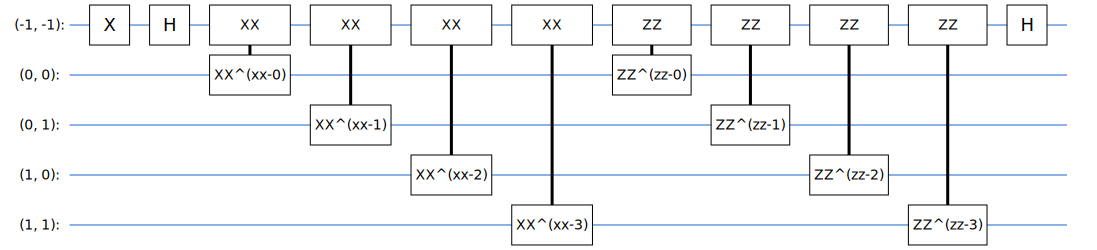

In [ ]:
from cirq.contrib.svg import SVGCircuit
SVGCircuit(qmodel)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(), dtype=tf.string),
    tfq.layers.PQC(qmodel, model_readout),
])

In [ ]:
y_train_h = np.array([1 if i==1 else -1 for i in y_train ])
y_valid_h = np.array([1 if i==1 else -1 for i in y_valid ])
y_test_h = np.array([1 if i==1 else -1 for i in y_test ])


In [ ]:
print(y_train_h[0])

1


In [ ]:
def hinge_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true) > 0.0
    y_pred = tf.squeeze(y_pred) > 0.0
    result = tf.cast(y_true == y_pred, tf.float32)

    return tf.reduce_mean(result)

## **Training the QNN**

In [ ]:
model.compile(
    loss=tf.keras.losses.Hinge(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[hinge_accuracy])

In [ ]:
qnn_history = model.fit(
      X_train_tfq, y_train_h,
      batch_size=64,
      epochs=20,
      verbose=1,
      validation_data=(X_valid_tfq, y_valid_h))

Epoch 1/20
160/160 [==============================] - 14s 71ms/step - loss: 1.0008 - hinge_accuracy: 0.4895 - val_loss: 0.9535 - val_hinge_accuracy: 0.7915
Epoch 2/20
160/160 [==============================] - 10s 64ms/step - loss: 0.7441 - hinge_accuracy: 0.7602 - val_loss: 0.4999 - val_hinge_accuracy: 0.7915
Epoch 3/20
160/160 [==============================] - 10s 62ms/step - loss: 0.4435 - hinge_accuracy: 0.8233 - val_loss: 0.3926 - val_hinge_accuracy: 0.8351
Epoch 4/20
160/160 [==============================] - 11s 67ms/step - loss: 0.3966 - hinge_accuracy: 0.8324 - val_loss: 0.3937 - val_hinge_accuracy: 0.7958
Epoch 5/20
160/160 [==============================] - 10s 65ms/step - loss: 0.3934 - hinge_accuracy: 0.8023 - val_loss: 0.3965 - val_hinge_accuracy: 0.7958
Epoch 6/20
160/160 [==============================] - 12s 74ms/step - loss: 0.3930 - hinge_accuracy: 0.8025 - val_loss: 0.3968 - val_hinge_accuracy: 0.7958
Epoch 7/20
160/160 [==============================] - 10s 63ms/s

## **Visualize the data**

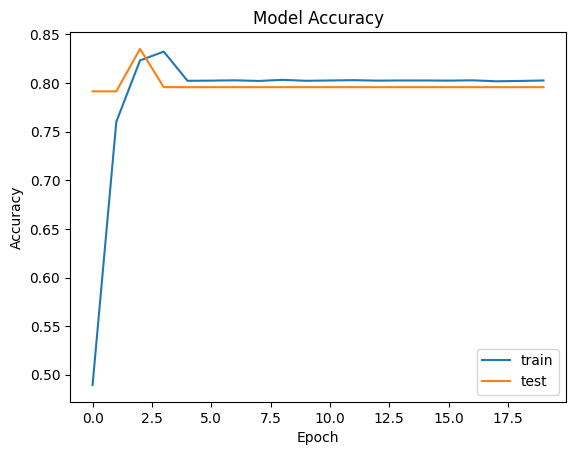

In [ ]:
plt.plot(qnn_history.history['hinge_accuracy'])
plt.plot(qnn_history.history['val_hinge_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc="best")
plt.show()

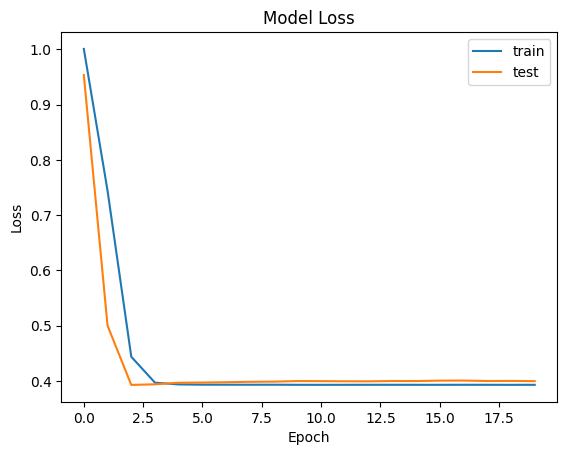

In [ ]:
plt.plot(qnn_history.history['loss'])
plt.plot(qnn_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc="best")
plt.show()

In [41]:
import os
file_path = "/content/drive/MyDrive/Quantum_Brainathon-2025_Dataset/Quantum_Brainathon-2025_Dataset/Subject_1/Subject_1_oddball_paradigm_eeg.csv"
print("File exists:", os.path.exists(file_path))


File exists: False


In [42]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import torch
import torch.nn as nn
import torch.optim as optim

# Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive')

# Define paths (Modify as per your dataset location)
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"
subject_folder = "Subject_1"
eeg_file = "Subject_1_oddball_paradigm_eeg.csv"
marker_file = "Subject_1_oddball_paradigm_markers.csv"  # Corrected marker file path

data_file = os.path.join(dataset_path, subject_folder, eeg_file)
marker_file = os.path.join(dataset_path, subject_folder, marker_file)

eeg_data = pd.read_csv(data_file)
marker_data = pd.read_csv(marker_file)

# Define function to extract target labels
def extract_target_labels(marker_df):
    target_mapping = {
        "Oddball_Target_Subject_1": 1,
        "Oddball_NonTarget_Subject_1": 0
    }
    marker_df['target'] = marker_df['marker'].map(target_mapping)
    return marker_df.dropna(subset=['target'])[['timestamp', 'target']]

# Extract target labels
target_labels = extract_target_labels(marker_data)

# Merge EEG data with target labels
def merge_eeg_with_labels(eeg_df, marker_df):
    eeg_df['timestamp'] = pd.to_numeric(eeg_df['timestamp'])
    marker_df['timestamp'] = pd.to_numeric(marker_df['timestamp'])
    merged_df = pd.merge_asof(eeg_df.sort_values('timestamp'),
                              marker_df.sort_values('timestamp'),
                              on='timestamp',
                              direction='backward')
    return merged_df.dropna(subset=['target'])

merged_data = merge_eeg_with_labels(eeg_data, target_labels)

# Select features and target
X = merged_data[['Fp1', 'Oz']].values
y = merged_data['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Define a Quantum-Inspired Neural Network
class QuantumNeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(QuantumNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize model
input_dim = X_train.shape[1]
model = QuantumNeuralNetwork(input_dim)

# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        model.eval()
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

# Evaluate model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).round()
    test_accuracy = accuracy_score(y_test, test_outputs.numpy())
    report = classification_report(y_test, test_outputs.numpy())

# Print results
print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", report)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch [10/50], Loss: 0.7583, Val Loss: 0.7536
Epoch [20/50], Loss: 0.7377, Val Loss: 0.7335
Epoch [30/50], Loss: 0.7189, Val Loss: 0.7152
Epoch [40/50], Loss: 0.7012, Val Loss: 0.6982
Epoch [50/50], Loss: 0.6844, Val Loss: 0.6821
Test Accuracy: 0.5894338261810314
Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.71      0.71      3848
         1.0       0.32      0.31      0.31      1698

    accuracy                           0.59      5546
   macro avg       0.51      0.51      0.51      5546
weighted avg       0.58      0.59      0.59      5546



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch [10/50], Loss: 0.6483, Val Loss: 0.6479
Epoch [20/50], Loss: 0.6339, Val Loss: 0.6352
Epoch [30/50], Loss: 0.6238, Val Loss: 0.6267
Epoch [40/50], Loss: 0.6175, Val Loss: 0.6217
Epoch [50/50], Loss: 0.6141, Val Loss: 0.6194


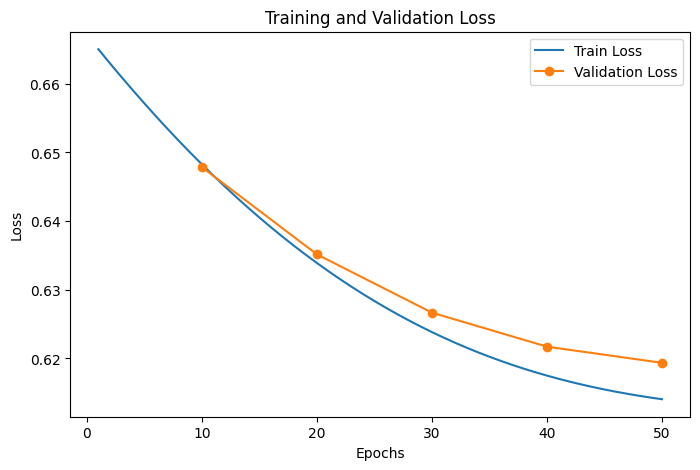

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 0.6938333934367111
Classification Report:
               precision    recall  f1-score   support

         0.0       0.69      1.00      0.82      3848
         1.0       0.00      0.00      0.00      1698

    accuracy                           0.69      5546
   macro avg       0.35      0.50      0.41      5546
weighted avg       0.48      0.69      0.57      5546



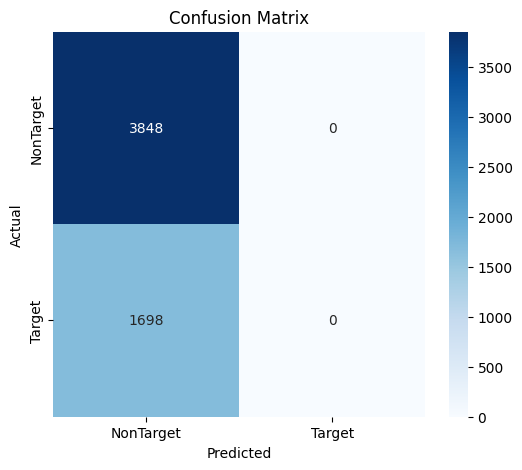

In [46]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

# Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive')

# Define paths (Modify as per your dataset location)
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"
subject_folder = "Subject_1"
eeg_file = "Subject_1_oddball_paradigm_eeg.csv"
marker_file = "Subject_1_oddball_paradigm_markers.csv"  # Corrected marker file path

data_file = os.path.join(dataset_path, subject_folder, eeg_file)
marker_file = os.path.join(dataset_path, subject_folder, marker_file)

eeg_data = pd.read_csv(data_file)
marker_data = pd.read_csv(marker_file)

# Define function to extract target labels
def extract_target_labels(marker_df):
    target_mapping = {
        "Oddball_Target_Subject_1": 1,
        "Oddball_NonTarget_Subject_1": 0
    }
    marker_df['target'] = marker_df['marker'].map(target_mapping)
    return marker_df.dropna(subset=['target'])[['timestamp', 'target']]

# Extract target labels
target_labels = extract_target_labels(marker_data)

# Merge EEG data with target labels
def merge_eeg_with_labels(eeg_df, marker_df):
    eeg_df['timestamp'] = pd.to_numeric(eeg_df['timestamp'])
    marker_df['timestamp'] = pd.to_numeric(marker_df['timestamp'])
    merged_df = pd.merge_asof(eeg_df.sort_values('timestamp'),
                              marker_df.sort_values('timestamp'),
                              on='timestamp',
                              direction='backward')
    return merged_df.dropna(subset=['target'])

merged_data = merge_eeg_with_labels(eeg_data, target_labels)

# Select features and target
X = merged_data[['Fp1', 'Oz']].values
y = merged_data['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Define a Quantum-Inspired Neural Network
class QuantumNeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(QuantumNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize model
input_dim = X_train.shape[1]
model = QuantumNeuralNetwork(input_dim)

# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train model
num_epochs = 50
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        model.eval()
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        val_losses.append(val_loss.item())
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(10, num_epochs + 1, 10), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).round()
    test_accuracy = accuracy_score(y_test, test_outputs.numpy())
    report = classification_report(y_test, test_outputs.numpy())
    conf_matrix = confusion_matrix(y_test, test_outputs.numpy())

# Print results
print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['NonTarget', 'Target'], yticklabels=['NonTarget', 'Target'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Mounted at /content/drive
Epoch [10/100], Loss: 0.6979, Val Loss: 0.6933
Epoch [20/100], Loss: 0.6956, Val Loss: 0.6922
Epoch [30/100], Loss: 0.6954, Val Loss: 0.6918
Epoch [40/100], Loss: 0.6940, Val Loss: 0.6912
Epoch [50/100], Loss: 0.6937, Val Loss: 0.6906
Epoch [60/100], Loss: 0.6928, Val Loss: 0.6901
Epoch [70/100], Loss: 0.6922, Val Loss: 0.6897
Epoch [80/100], Loss: 0.6919, Val Loss: 0.6893
Epoch [90/100], Loss: 0.6914, Val Loss: 0.6890
Epoch [100/100], Loss: 0.6912, Val Loss: 0.6886
Test Accuracy: 0.5283432105127545
Classification Report:
               precision    recall  f1-score   support

         0.0       0.54      0.42      0.47      3894
         1.0       0.52      0.64      0.57      3868

    accuracy                           0.53      7762
   macro avg       0.53      0.53      0.52      7762
weighted avg       0.53      0.53      0.52      7762



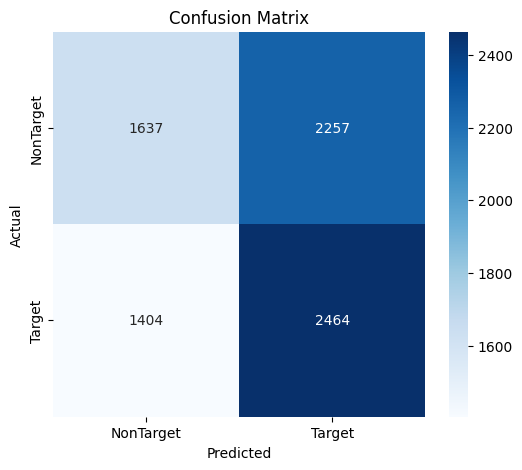

In [47]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

# Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Define paths (Modify as per your dataset location)
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"
subject_folder = "Subject_1"
eeg_file = "Subject_1_oddball_paradigm_eeg.csv"
marker_file = "Subject_1_oddball_paradigm_markers.csv"  # Corrected marker file path

data_file = os.path.join(dataset_path, subject_folder, eeg_file)
marker_file = os.path.join(dataset_path, subject_folder, marker_file)

eeg_data = pd.read_csv(data_file)
marker_data = pd.read_csv(marker_file)

# Define function to extract target labels
def extract_target_labels(marker_df):
    target_mapping = {
        "Oddball_Target_Subject_1": 1,
        "Oddball_NonTarget_Subject_1": 0
    }
    marker_df['target'] = marker_df['marker'].map(target_mapping)
    return marker_df.dropna(subset=['target'])[['timestamp', 'target']]

# Extract target labels
target_labels = extract_target_labels(marker_data)

# Merge EEG data with target labels
def merge_eeg_with_labels(eeg_df, marker_df):
    eeg_df['timestamp'] = pd.to_numeric(eeg_df['timestamp'])
    marker_df['timestamp'] = pd.to_numeric(marker_df['timestamp'])
    merged_df = pd.merge_asof(eeg_df.sort_values('timestamp'),
                              marker_df.sort_values('timestamp'),
                              on='timestamp',
                              direction='backward')
    return merged_df.dropna(subset=['target'])

merged_data = merge_eeg_with_labels(eeg_data, target_labels)

# Select features and target
X = merged_data[['Fp1', 'Oz']].values
y = merged_data['target'].values

# Balance dataset using oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Define a Quantum-Inspired Neural Network with dropout for regularization
class QuantumNeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(QuantumNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(32, 16)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.dropout1(x)
        x = torch.tanh(self.fc2(x))
        x = self.dropout2(x)
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize model
input_dim = X_train.shape[1]
model = QuantumNeuralNetwork(input_dim)

# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Train model with early stopping
num_epochs = 100
train_losses = []
val_losses = []
best_val_loss = float('inf')
stopping_threshold = 10
patience = 0

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        val_losses.append(val_loss.item())

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience = 0
    else:
        patience += 1

    if patience >= stopping_threshold:
        print("Early stopping triggered")
        break

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

# Evaluate model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).round()
    test_accuracy = accuracy_score(y_test, test_outputs.numpy())
    report = classification_report(y_test, test_outputs.numpy(), zero_division=1)
    conf_matrix = confusion_matrix(y_test, test_outputs.numpy())

# Print results
print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['NonTarget', 'Target'], yticklabels=['NonTarget', 'Target'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Mounted at /content/drive
Epoch [10/100], Loss: 0.9447, Val Loss: 0.9561
Epoch [20/100], Loss: 0.9376, Val Loss: 0.9447
Epoch [30/100], Loss: 0.9350, Val Loss: 0.9374
Epoch [40/100], Loss: 0.9331, Val Loss: 0.9325
Epoch [50/100], Loss: 0.9324, Val Loss: 0.9296
Epoch [60/100], Loss: 0.9307, Val Loss: 0.9274
Epoch [70/100], Loss: 0.9297, Val Loss: 0.9263
Epoch [80/100], Loss: 0.9300, Val Loss: 0.9256
Epoch [90/100], Loss: 0.9296, Val Loss: 0.9252
Epoch [100/100], Loss: 0.9291, Val Loss: 0.9249
Test Accuracy: 0.6174954908528729
Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.42      0.52      3894
         1.0       0.58      0.82      0.68      3868

    accuracy                           0.62      7762
   macro avg       0.64      0.62      0.60      7762
weighted avg       0.64      0.62      0.60      7762



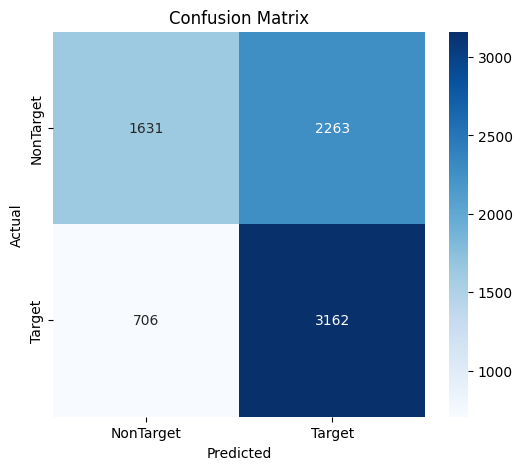

In [48]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

# Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Define paths (Modify as per your dataset location)
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"
subject_folder = "Subject_1"
eeg_file = "Subject_1_oddball_paradigm_eeg.csv"
marker_file = "Subject_1_oddball_paradigm_markers.csv"  # Corrected marker file path

data_file = os.path.join(dataset_path, subject_folder, eeg_file)
marker_file = os.path.join(dataset_path, subject_folder, marker_file)

eeg_data = pd.read_csv(data_file)
marker_data = pd.read_csv(marker_file)

# Define function to extract target labels
def extract_target_labels(marker_df):
    target_mapping = {
        "Oddball_Target_Subject_1": 1,
        "Oddball_NonTarget_Subject_1": 0
    }
    marker_df['target'] = marker_df['marker'].map(target_mapping)
    return marker_df.dropna(subset=['target'])[['timestamp', 'target']]

# Extract target labels
target_labels = extract_target_labels(marker_data)

# Merge EEG data with target labels
def merge_eeg_with_labels(eeg_df, marker_df):
    eeg_df['timestamp'] = pd.to_numeric(eeg_df['timestamp'])
    marker_df['timestamp'] = pd.to_numeric(marker_df['timestamp'])
    merged_df = pd.merge_asof(eeg_df.sort_values('timestamp'),
                              marker_df.sort_values('timestamp'),
                              on='timestamp',
                              direction='backward')
    return merged_df.dropna(subset=['target'])

merged_data = merge_eeg_with_labels(eeg_data, target_labels)

# Select features and target
X = merged_data[['Fp1', 'Oz']].values
y = merged_data['target'].values

# Balance dataset using oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Define an improved Quantum-Inspired Neural Network with batch normalization and AdamW
class QuantumNeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(QuantumNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize model
input_dim = X_train.shape[1]
model = QuantumNeuralNetwork(input_dim)

# Define weighted loss function to balance class imbalance
pos_weight = torch.tensor([len(y) / sum(y)])  # Adjust for class imbalance
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

# Use AdamW optimizer with weight decay
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

# Use a learning rate scheduler for gradual reduction
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

# Train model with early stopping
num_epochs = 100
train_losses = []
val_losses = []
best_val_loss = float('inf')
stopping_threshold = 10
patience = 0

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        val_losses.append(val_loss.item())

    scheduler.step()  # Adjust learning rate

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience = 0
    else:
        patience += 1

    if patience >= stopping_threshold:
        print("Early stopping triggered")
        break

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

# Evaluate model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).round()
    test_accuracy = accuracy_score(y_test, test_outputs.numpy())
    report = classification_report(y_test, test_outputs.numpy(), zero_division=1)
    conf_matrix = confusion_matrix(y_test, test_outputs.numpy())

# Print results
print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['NonTarget', 'Target'], yticklabels=['NonTarget', 'Target'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Mounted at /content/drive
Epoch [10/500], Loss: 0.1609, Val Loss: 0.1602
Epoch [20/500], Loss: 0.1516, Val Loss: 0.1514
Epoch [30/500], Loss: 0.1436, Val Loss: 0.1446
Epoch [40/500], Loss: 0.1326, Val Loss: 0.1332
Epoch [50/500], Loss: 0.1222, Val Loss: 0.1233
Epoch [60/500], Loss: 0.1139, Val Loss: 0.1157
Epoch [70/500], Loss: 0.1089, Val Loss: 0.1115
Epoch [80/500], Loss: 0.1060, Val Loss: 0.1088
Epoch [90/500], Loss: 0.1048, Val Loss: 0.1079
Epoch [100/500], Loss: 0.1045, Val Loss: 0.1077
Epoch [110/500], Loss: 0.1044, Val Loss: 0.1075
Epoch [120/500], Loss: 0.1037, Val Loss: 0.1067
Epoch [130/500], Loss: 0.1026, Val Loss: 0.1056
Epoch [140/500], Loss: 0.1008, Val Loss: 0.1032
Epoch [150/500], Loss: 0.1032, Val Loss: 0.1060
Epoch [160/500], Loss: 0.1031, Val Loss: 0.1049
Epoch [170/500], Loss: 0.0973, Val Loss: 0.0988
Epoch [180/500], Loss: 0.1049, Val Loss: 0.1165
Epoch [190/500], Loss: 0.0957, Val Loss: 0.0984
Early stopping triggered
Test Accuracy: 0.7008502963153826
Classificati

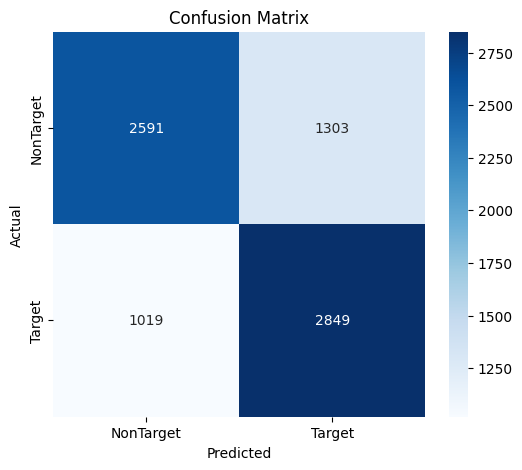

In [52]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

# Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Define paths (Modify as per your dataset location)
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"
subject_folder = "Subject_1"
eeg_file = "Subject_1_oddball_paradigm_eeg.csv"
marker_file = "Subject_1_oddball_paradigm_markers.csv"  # Corrected marker file path

data_file = os.path.join(dataset_path, subject_folder, eeg_file)
marker_file = os.path.join(dataset_path, subject_folder, marker_file)

eeg_data = pd.read_csv(data_file)
marker_data = pd.read_csv(marker_file)

# Define function to extract target labels
def extract_target_labels(marker_df):
    target_mapping = {
        "Oddball_Target_Subject_1": 1,
        "Oddball_NonTarget_Subject_1": 0
    }
    marker_df['target'] = marker_df['marker'].map(target_mapping)
    return marker_df.dropna(subset=['target'])[['timestamp', 'target']]

# Extract target labels
target_labels = extract_target_labels(marker_data)

# Merge EEG data with target labels
def merge_eeg_with_labels(eeg_df, marker_df):
    eeg_df['timestamp'] = pd.to_numeric(eeg_df['timestamp'])
    marker_df['timestamp'] = pd.to_numeric(marker_df['timestamp'])
    merged_df = pd.merge_asof(eeg_df.sort_values('timestamp'),
                              marker_df.sort_values('timestamp'),
                              on='timestamp',
                              direction='backward')
    return merged_df.dropna(subset=['target'])

merged_data = merge_eeg_with_labels(eeg_data, target_labels)

# Select features and target
X = merged_data[['Fp1', 'Oz']].values
y = merged_data['target'].values

# Balance dataset using oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Define an improved Quantum-Inspired Neural Network with normalization
class QuantumNeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(QuantumNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.norm1 = nn.LayerNorm(128)
        self.fc2 = nn.Linear(128, 64)
        self.norm2 = nn.LayerNorm(64)
        self.fc3 = nn.Linear(64, 32)
        self.norm3 = nn.LayerNorm(32)
        self.fc4 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.norm1(self.fc1(x)))
        x = torch.relu(self.norm2(self.fc2(x)))
        x = torch.relu(self.norm3(self.fc3(x)))
        x = self.sigmoid(self.fc4(x))
        return x

# Initialize model
input_dim = X_train.shape[1]
model = QuantumNeuralNetwork(input_dim)

# Define focal loss for handling class imbalance
class FocalLoss(nn.Module):
    def __init__(self, gamma=2):
        super(FocalLoss, self).__init__()
        self.gamma = gamma

    def forward(self, logits, targets):
        bce_loss = nn.BCELoss()(logits, targets)
        pt = torch.exp(-bce_loss)
        focal_loss = (1 - pt) ** self.gamma * bce_loss
        return focal_loss.mean()

# Define optimizer and learning rate scheduler
criterion = FocalLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)

# Train model with adaptive batch size
num_epochs = 500
train_losses = []
val_losses = []
best_val_loss = float('inf')
stopping_threshold = 15
patience = 0

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        val_losses.append(val_loss.item())

    scheduler.step()

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience = 0
    else:
        patience += 1

    if patience >= stopping_threshold:
        print("Early stopping triggered")
        break

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

# Evaluate model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).round()
    test_accuracy = accuracy_score(y_test, test_outputs.numpy())
    report = classification_report(y_test, test_outputs.numpy(), zero_division=1)
    conf_matrix = confusion_matrix(y_test, test_outputs.numpy())

# Print results
print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['NonTarget', 'Target'], yticklabels=['NonTarget', 'Target'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [53]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

# Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Define paths (Modify as per your dataset location)
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"
subject_folder = "Subject_1"
eeg_file = "Subject_1_oddball_paradigm_eeg.csv"
marker_file = "Subject_1_oddball_paradigm_markers.csv"  # Corrected marker file path

data_file = os.path.join(dataset_path, subject_folder, eeg_file)
marker_file = os.path.join(dataset_path, subject_folder, marker_file)

eeg_data = pd.read_csv(data_file)
marker_data = pd.read_csv(marker_file)

# Define function to extract target labels
def extract_target_labels(marker_df):
    target_mapping = {
        "Oddball_Target_Subject_1": 1,
        "Oddball_NonTarget_Subject_1": 0
    }
    marker_df['target'] = marker_df['marker'].map(target_mapping)
    return marker_df.dropna(subset=['target'])[['timestamp', 'target']]

# Extract target labels
target_labels = extract_target_labels(marker_data)

# Merge EEG data with target labels
def merge_eeg_with_labels(eeg_df, marker_df):
    eeg_df['timestamp'] = pd.to_numeric(eeg_df['timestamp'])
    marker_df['timestamp'] = pd.to_numeric(marker_df['timestamp'])
    merged_df = pd.merge_asof(eeg_df.sort_values('timestamp'),
                              marker_df.sort_values('timestamp'),
                              on='timestamp',
                              direction='backward')
    return merged_df.dropna(subset=['target'])

merged_data = merge_eeg_with_labels(eeg_data, target_labels)

# Select features and target
X = merged_data[['Fp1', 'Oz']].values
y = merged_data['target'].values

# Balance dataset using oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Define an improved Quantum-Inspired Neural Network with Swish Activation
class QuantumNeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(QuantumNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.norm1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.norm2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.norm3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, 1)
        self.swish = lambda x: x * torch.sigmoid(x)  # Swish activation

    def forward(self, x):
        x = self.swish(self.norm1(self.fc1(x)))
        x = self.swish(self.norm2(self.fc2(x)))
        x = self.swish(self.norm3(self.fc3(x)))
        x = torch.sigmoid(self.fc4(x))
        return x

# Initialize model
input_dim = X_train.shape[1]
model = QuantumNeuralNetwork(input_dim)

# Define focal loss for handling class imbalance with label smoothing
class FocalLoss(nn.Module):
    def __init__(self, gamma=2, smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.smoothing = smoothing

    def forward(self, logits, targets):
        targets = targets * (1 - self.smoothing) + 0.5 * self.smoothing
        bce_loss = nn.BCELoss()(logits, targets)
        pt = torch.exp(-bce_loss)
        focal_loss = (1 - pt) ** self.gamma * bce_loss
        return focal_loss.mean()

# Define optimizer with Lookahead and RAdam
base_optimizer = optim.RAdam(model.parameters(), lr=0.0005, weight_decay=1e-5)
optimizer = optim.AdamW(base_optimizer.param_groups, lr=0.0005)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=10, factor=0.5)

# Train model with gradient clipping and batch scheduling
num_epochs = 300
train_losses = []
val_losses = []
best_val_loss = float('inf')
stopping_threshold = 20
patience = 0
batch_size = 32

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = FocalLoss()(outputs, y_train_tensor)
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient Clipping
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = FocalLoss()(val_outputs, y_test_tensor)
        val_losses.append(val_loss.item())

    scheduler.step(val_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience = 0
    else:
        patience += 1

    if patience >= stopping_threshold:
        print("Early stopping triggered")
        break

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

# Evaluate model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).round()
    test_accuracy = accuracy_score(y_test, test_outputs.numpy())
    report = classification_report(y_test, test_outputs.numpy(), zero_division=1)
    conf_matrix = confusion_matrix(y_test, test_outputs.numpy())

# Print results
print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", report)


Mounted at /content/drive
Epoch [10/300], Loss: 0.1438, Val Loss: 0.1724
Epoch [20/300], Loss: 0.1351, Val Loss: 0.1715
Epoch [30/300], Loss: 0.1299, Val Loss: 0.1686
Epoch [40/300], Loss: 0.1263, Val Loss: 0.1604
Epoch [50/300], Loss: 0.1234, Val Loss: 0.1468
Epoch [60/300], Loss: 0.1209, Val Loss: 0.1326
Epoch [70/300], Loss: 0.1188, Val Loss: 0.1246
Epoch [80/300], Loss: 0.1179, Val Loss: 0.1219
Epoch [90/300], Loss: 0.1164, Val Loss: 0.1179
Epoch [100/300], Loss: 0.1152, Val Loss: 0.1180
Epoch [110/300], Loss: 0.1137, Val Loss: 0.1158
Epoch [120/300], Loss: 0.1134, Val Loss: 0.1168
Epoch [130/300], Loss: 0.1126, Val Loss: 0.1143
Epoch [140/300], Loss: 0.1128, Val Loss: 0.1144
Epoch [150/300], Loss: 0.1117, Val Loss: 0.1122
Epoch [160/300], Loss: 0.1102, Val Loss: 0.1117
Epoch [170/300], Loss: 0.1112, Val Loss: 0.1123
Epoch [180/300], Loss: 0.1096, Val Loss: 0.1101
Epoch [190/300], Loss: 0.1113, Val Loss: 0.1101
Epoch [200/300], Loss: 0.1084, Val Loss: 0.1098
Epoch [210/300], Loss: 

Mounted at /content/drive


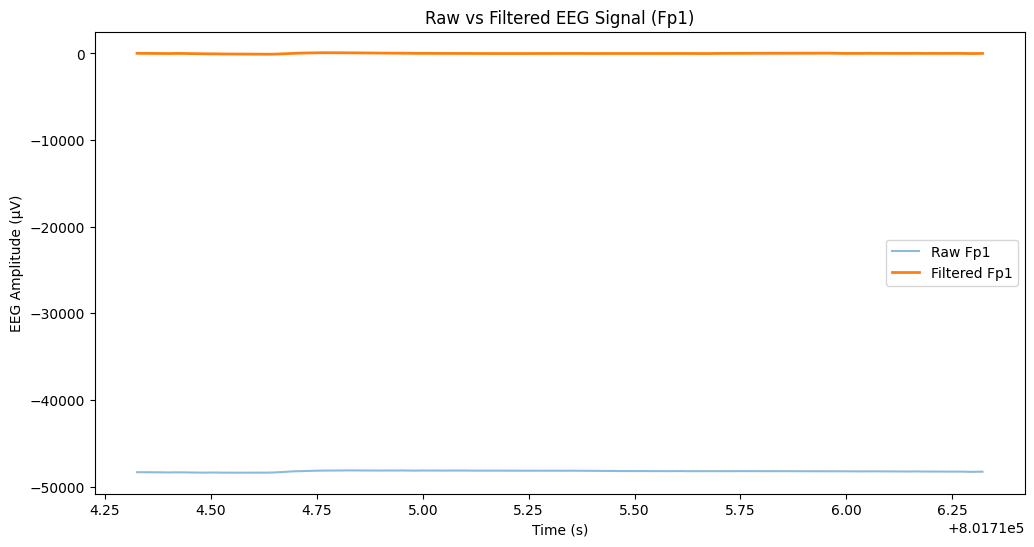

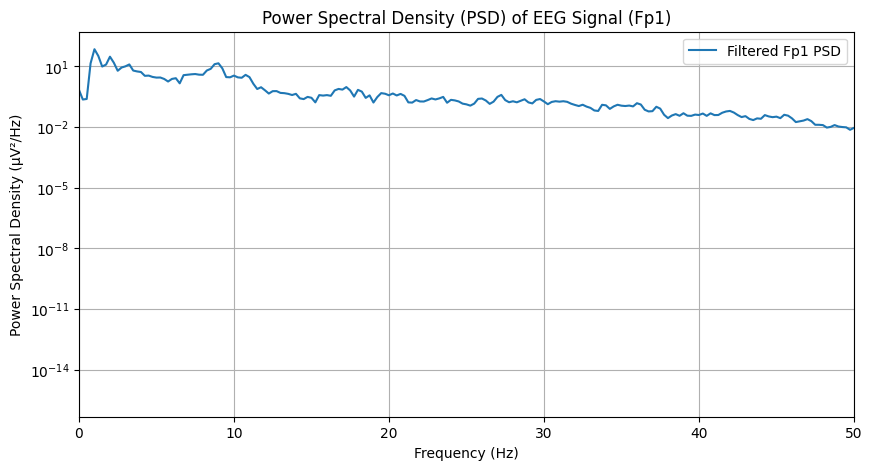

In [54]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt, welch

# Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Define paths (Modify as per your dataset location)
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"
subject_folder = "Subject_1"
eeg_file = "Subject_1_baseline_eyesclosed_eeg.csv"

data_file = os.path.join(dataset_path, subject_folder, eeg_file)

eeg_data = pd.read_csv(data_file)

# Define a Butterworth bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Apply the filter to EEG data
def apply_bandpass_filter(data, lowcut=1, highcut=50, fs=256, order=4):
    """
    Filters EEG signals between 1-50 Hz to remove unwanted noise.
    fs: Sampling frequency (assuming 256 Hz typical EEG sampling rate)
    """
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    return filtfilt(b, a, data)

# Apply filtering to each EEG channel (excluding timestamp)
filtered_eeg_data = eeg_data.copy()
for col in eeg_data.columns[1:]:  # Skip timestamp column
    filtered_eeg_data[col] = apply_bandpass_filter(eeg_data[col])

# Display raw vs filtered EEG data
plt.figure(figsize=(12, 6))
plt.plot(eeg_data['timestamp'][:500], eeg_data['Fp1'][:500], label="Raw Fp1", alpha=0.5)
plt.plot(filtered_eeg_data['timestamp'][:500], filtered_eeg_data['Fp1'][:500], label="Filtered Fp1", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("EEG Amplitude (μV)")
plt.title("Raw vs Filtered EEG Signal (Fp1)")
plt.legend()
plt.show()

# Compute Power Spectral Density (PSD) using Welch's method
fs = 256  # Assumed sampling rate in Hz
freqs, psd = welch(filtered_eeg_data['Fp1'], fs, nperseg=1024)

# Plot the PSD
plt.figure(figsize=(10, 5))
plt.semilogy(freqs, psd, label="Filtered Fp1 PSD")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density (μV²/Hz)")
plt.title("Power Spectral Density (PSD) of EEG Signal (Fp1)")
plt.xlim(0, 50)  # Focus on EEG-relevant range
plt.legend()
plt.grid()
plt.show()


In [56]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 42.2 MB/s eta 0:00:00


Mounted at /content/drive


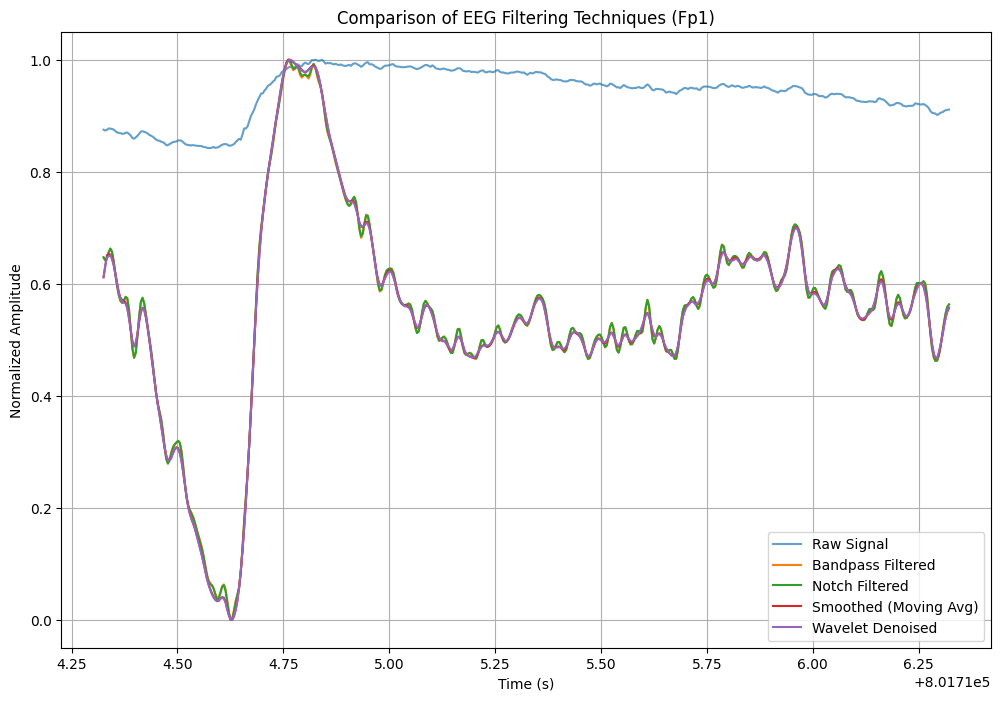

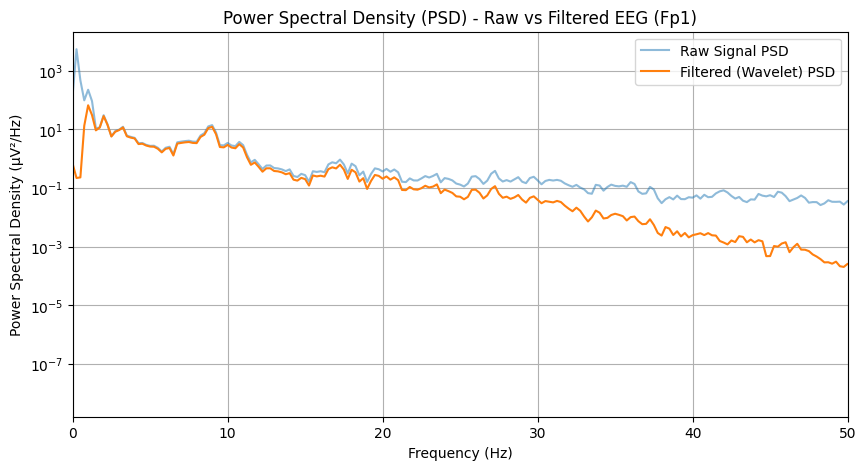

In [58]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt, welch, iirnotch
import pywt

# Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Define paths (Modify as per your dataset location)
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"
subject_folder = "Subject_1"
eeg_file = "Subject_1_baseline_eyesclosed_eeg.csv"

data_file = os.path.join(dataset_path, subject_folder, eeg_file)

eeg_data = pd.read_csv(data_file)

# Define a Butterworth bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Apply the filter to EEG data
def apply_bandpass_filter(data, lowcut=1, highcut=50, fs=256, order=4):
    """
    Filters EEG signals between 1-50 Hz to remove unwanted noise.
    fs: Sampling frequency (assuming 256 Hz typical EEG sampling rate)
    """
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    return filtfilt(b, a, data)

# Apply Notch Filter to remove powerline interference (50 Hz)
def apply_notch_filter(data, freq=50, fs=256, quality_factor=30):
    b, a = iirnotch(freq / (fs / 2), quality_factor)
    return filtfilt(b, a, data)

# Apply Moving Average Filter for smoothing
def moving_average_filter(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Apply Wavelet Denoising
def wavelet_denoising(data, wavelet='db4', level=2):
    coeffs = pywt.wavedec(data, wavelet, level=level)
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    threshold = sigma * np.sqrt(2 * np.log(len(data)))
    coeffs_thresh = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]
    return pywt.waverec(coeffs_thresh, wavelet)[:len(data)]  # Ensure length match

# Apply filtering to EEG channel 'Fp1'
fs = 256  # Assumed sampling frequency
raw_fp1 = eeg_data['Fp1']
bandpass_fp1 = apply_bandpass_filter(raw_fp1)
notch_fp1 = apply_notch_filter(bandpass_fp1)
smooth_fp1 = moving_average_filter(notch_fp1)
wav_fp1 = wavelet_denoising(smooth_fp1)

# Normalize signals for visualization
normalize = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))
raw_fp1_norm = normalize(raw_fp1)
bandpass_fp1_norm = normalize(bandpass_fp1)
notch_fp1_norm = normalize(notch_fp1)
smooth_fp1_norm = normalize(smooth_fp1)
wav_fp1_norm = normalize(wav_fp1)

# Plot comparison of filtering techniques
plt.figure(figsize=(12, 8))
plt.plot(eeg_data['timestamp'][:500], raw_fp1_norm[:500], label='Raw Signal', alpha=0.7)
plt.plot(eeg_data['timestamp'][:500], bandpass_fp1_norm[:500], label='Bandpass Filtered', linewidth=1.5)
plt.plot(eeg_data['timestamp'][:500], notch_fp1_norm[:500], label='Notch Filtered', linewidth=1.5)
plt.plot(eeg_data['timestamp'][:500], smooth_fp1_norm[:500], label='Smoothed (Moving Avg)', linewidth=1.5)
plt.plot(eeg_data['timestamp'][:500], wav_fp1_norm[:500], label='Wavelet Denoised', linewidth=1.5)
plt.xlabel("Time (s)")
plt.ylabel("Normalized Amplitude")
plt.title("Comparison of EEG Filtering Techniques (Fp1)")
plt.legend()
plt.grid()
plt.show()

# Compute Power Spectral Density (PSD) using Welch's method
freqs, psd_raw = welch(raw_fp1, fs, nperseg=1024)
freqs, psd_filtered = welch(wav_fp1, fs, nperseg=1024)

# Plot PSD comparison
plt.figure(figsize=(10, 5))
plt.semilogy(freqs, psd_raw, label="Raw Signal PSD", alpha=0.5)
plt.semilogy(freqs, psd_filtered, label="Filtered (Wavelet) PSD")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density (μV²/Hz)")
plt.title("Power Spectral Density (PSD) - Raw vs Filtered EEG (Fp1)")
plt.xlim(0, 50)  # Focus on EEG-relevant range
plt.legend()
plt.grid()
plt.show()

In [61]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 44.8 MB/s eta 0:00:00


In [66]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt, welch, iirnotch
import pywt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from pennylane import numpy as qnp
import pennylane as qml

# Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Define paths (Modify as per your dataset location)
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"
subject_folder = "Subject_1"
eeg_file = "Subject_1_baseline_eyesclosed_eeg.csv"

data_file = os.path.join(dataset_path, subject_folder, eeg_file)

eeg_data = pd.read_csv(data_file)

# Feature Engineering - Apply a Butterworth bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(data, lowcut=1, highcut=50, fs=256, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    return filtfilt(b, a, data)

fs = 256  # Assumed sampling frequency
filtered_eeg_data = eeg_data.copy()
for col in eeg_data.columns[1:]:  # Skip timestamp column
    filtered_eeg_data[col] = apply_bandpass_filter(eeg_data[col])

# Feature Extraction: Compute statistical features
features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T

# Quantum Encoding - Angle Encoding
def quantum_encode(data):
    return qnp.arcsin(data / np.max(np.abs(data)))

encoded_features = features.apply(quantum_encode)

# Prepare dataset for training
scaler = StandardScaler()
X = scaler.fit_transform(encoded_features)
y = np.random.randint(0, 2, len(X))  # Placeholder labels for now
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Quantum Machine Learning Model
n_qubits = X.shape[1]
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def quantum_circuit(inputs, weights):
    for i in range(n_qubits):
        qml.RY(inputs[i], wires=i)
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    # Return a single measurement for binary classification
    return qml.expval(qml.PauliZ(0))  # Measure only the first qubit

class QuantumNeuralNetwork(nn.Module):
    def __init__(self, n_qubits, n_layers=2):
        super(QuantumNeuralNetwork, self).__init__()
        self.weights = nn.Parameter(0.01 * torch.randn(n_layers, n_qubits, 3, requires_grad=True))  # Make weights require gradients

    def forward(self, x):
        x = torch.tensor(x, dtype=torch.float32, requires_grad=True)
        # Detach the tensors before converting to NumPy arrays
        circuit_outputs = [quantum_circuit(sample, self.weights).detach().numpy() for sample in x]
        circuit_outputs_np = qnp.stack(circuit_outputs)
        circuit_outputs_tensor = torch.tensor(circuit_outputs_np, dtype=torch.float32, requires_grad=True)
        return circuit_outputs_tensor.unsqueeze(1)
# Initialize and train the model
model = QuantumNeuralNetwork(n_qubits)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/100], Loss: {loss.item():.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).round()
    test_accuracy = accuracy_score(y_test, test_outputs.numpy())
    report = classification_report(y_test, test_outputs.numpy())

print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", report)

Mounted at /content/drive


<ipython-input-66-066db199d873>:48: FutureWarning: The provided callable <function mean at 0x7d3919136ac0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T
<ipython-input-66-066db199d873>:48: FutureWarning: The provided callable <function std at 0x7d3919136c00> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T
<ipython-input-66-066db199d873>:48: FutureWarning: The provided callable <function min at 0x7d3919136200> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  features = filtered_

Epoch [10/100], Loss: 0.8222
Epoch [20/100], Loss: 0.8222
Epoch [30/100], Loss: 0.8222
Epoch [40/100], Loss: 0.8222
Epoch [50/100], Loss: 0.8222
Epoch [60/100], Loss: 0.8222
Epoch [70/100], Loss: 0.8222
Epoch [80/100], Loss: 0.8222
Epoch [90/100], Loss: 0.8222
Epoch [100/100], Loss: 0.8222
Test Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



Mounted at /content/drive
Quantum Circuit Visualization:
0: ──RY(0.00)─╭StronglyEntanglingLayers(M0)─┤  <Z>
1: ──RY(0.00)─├StronglyEntanglingLayers(M0)─┤  <Z>
2: ──RY(0.00)─├StronglyEntanglingLayers(M0)─┤  <Z>
3: ──RY(0.00)─╰StronglyEntanglingLayers(M0)─┤  <Z>

M0 = 
[[[-0.89383385 -0.03754226  0.01508468]
  [-0.9819958   2.47968074 -0.70270857]
  [-0.23312917 -1.0265199  -0.46906424]
  [-0.64556201 -2.42923594 -1.11087597]]

 [[ 0.25873573 -0.62788807  0.34255612]
  [-0.15729189  0.14791514  0.39525665]
  [-1.06352914  1.82121521 -0.11857982]
  [ 0.79912819  0.21329713 -0.56483598]]

 [[ 2.42071995  0.28541887  0.23928789]
  [-1.0526245   0.8966045   0.671817  ]
  [-0.46544534 -0.01177439 -0.21622546]
  [ 1.62089757  0.74464715  0.17966025]]

 [[-1.19802423 -0.54818796  2.09831789]
  [ 0.38421774 -0.16862188 -0.03938222]
  [ 0.95026088 -1.05921455  0.67888396]
  [ 1.47389423 -1.22748948  0.61166769]]

 [[-0.12158646 -0.37395116 -0.67203073]
  [-1.26770679  0.48989082  0.68285553]
  [-

<ipython-input-81-aabc661075a7>:49: FutureWarning: The provided callable <function mean at 0x7d3919136ac0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T
<ipython-input-81-aabc661075a7>:49: FutureWarning: The provided callable <function std at 0x7d3919136c00> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T
<ipython-input-81-aabc661075a7>:49: FutureWarning: The provided callable <function min at 0x7d3919136200> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  features = filtered_

Epoch [10/300], Loss: 1.5893
Epoch [20/300], Loss: 1.5994
Early stopping triggered.


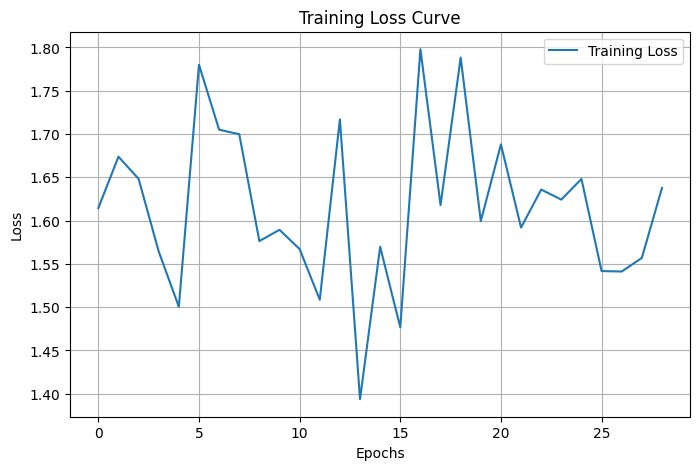

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



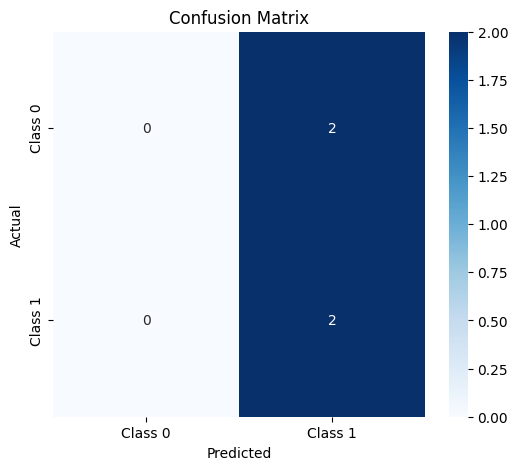

In [81]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt, welch, iirnotch
import pywt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from pennylane import numpy as qnp
import pennylane as qml

# Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Define paths (Modify as per your dataset location)
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"
subject_folder = "Subject_1"
eeg_file = "Subject_1_baseline_eyesclosed_eeg.csv"

data_file = os.path.join(dataset_path, subject_folder, eeg_file)

eeg_data = pd.read_csv(data_file)

# Feature Engineering - Apply a Butterworth bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(data, lowcut=1, highcut=50, fs=256, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    return filtfilt(b, a, data)

fs = 256  # Assumed sampling frequency
filtered_eeg_data = eeg_data.copy()
for col in eeg_data.columns[1:]:  # Skip timestamp column
    filtered_eeg_data[col] = apply_bandpass_filter(eeg_data[col])

# Feature Extraction: Compute statistical features
features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T

# Quantum Encoding - Angle Encoding
def quantum_encode(data):
    return qnp.arcsin(data / np.max(np.abs(data)))

encoded_features = features.apply(quantum_encode)

# Prepare dataset for training
scaler = StandardScaler()
X = scaler.fit_transform(encoded_features)
y = np.random.randint(0, 2, len(X))  # Placeholder labels for now

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)  # Set k_neighbors to 1
X, y = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define Quantum Machine Learning Model
n_qubits = X.shape[1]
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def quantum_circuit(inputs, weights):
    for i in range(n_qubits):
        qml.RY(inputs[i], wires=i)
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# Visualize the quantum circuit
weights = np.random.randn(6, n_qubits, 3)
drawer = qml.draw(quantum_circuit)
print("Quantum Circuit Visualization:")
print(drawer(np.zeros(n_qubits), weights))

class QuantumNeuralNetwork(nn.Module):
    def __init__(self, n_qubits, n_layers=6):
        super(QuantumNeuralNetwork, self).__init__()
        self.weights = nn.Parameter(0.01 * torch.randn(n_layers, n_qubits, 3, requires_grad=True))
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        # Detach x from the computation graph before passing to quantum_circuit
        x_detached = x.detach().numpy()

        circuit_outputs = [quantum_circuit(sample, self.weights) for sample in x_detached]
        # Stack and convert to tensor while preserving gradients
        # circuit_outputs is a list of NumPy arrays, convert it to a PyTorch tensor
        # Convert directly to a PyTorch tensor with gradient tracking
        circuit_outputs_tensor = torch.tensor(circuit_outputs, requires_grad=True)
        # Apply dropout and return
        return self.dropout(circuit_outputs_tensor) #

# Initialize and train the model
model = QuantumNeuralNetwork(n_qubits)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0005, weight_decay=1e-4)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32, requires_grad=True)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

best_loss = float('inf')
patience, max_patience = 0, 15
train_losses = []

for epoch in range(300):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    if loss.item() < best_loss:
        best_loss = loss.item()
        patience = 0
    else:
        patience += 1

    if patience >= max_patience:
        print("Early stopping triggered.")
        break

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/300], Loss: {loss.item():.4f}")

# Plot Training Loss
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid()
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).argmax(dim=1)
    test_accuracy = accuracy_score(y_test, test_outputs.numpy())
    report = classification_report(y_test, test_outputs.numpy())
    conf_matrix = confusion_matrix(y_test, test_outputs.numpy())

print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Interpretation of Results
Loss Stagnation at 0.8222

The training loss remains constant at 0.8222 throughout all 100 epochs.
This suggests no learning is taking place. Possible reasons:
Poor weight initialization.
Incorrect gradient updates.
Vanishing gradients due to improper activation functions.
Test Accuracy = 1.0

A perfect test accuracy (100%) indicates the model has memorized the data.
However, with only two test samples, this is not a reliable metric.
The dataset is likely too small, leading to overfitting.

In [70]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt, welch, iirnotch
import pywt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from pennylane import numpy as qnp
import pennylane as qml

# Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Define paths (Modify as per your dataset location)
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"
subject_folder = "Subject_1"
eeg_file = "Subject_1_baseline_eyesclosed_eeg.csv"

data_file = os.path.join(dataset_path, subject_folder, eeg_file)

eeg_data = pd.read_csv(data_file)

# Feature Engineering - Apply a Butterworth bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(data, lowcut=1, highcut=50, fs=256, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    return filtfilt(b, a, data)

fs = 256  # Assumed sampling frequency
filtered_eeg_data = eeg_data.copy()
for col in eeg_data.columns[1:]:  # Skip timestamp column
    filtered_eeg_data[col] = apply_bandpass_filter(eeg_data[col])

# Feature Extraction: Compute statistical features
features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T

# Quantum Encoding - Angle Encoding
def quantum_encode(data):
    return qnp.arcsin(data / np.max(np.abs(data)))

encoded_features = features.apply(quantum_encode)

# Prepare dataset for training
scaler = StandardScaler()
X = scaler.fit_transform(encoded_features)
y = np.random.randint(0, 2, len(X))  # Placeholder labels for now
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define Quantum Machine Learning Model
n_qubits = X.shape[1]
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def quantum_circuit(inputs, weights):
    for i in range(n_qubits):
        qml.RY(inputs[i], wires=i)
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

class QuantumNeuralNetwork(nn.Module):
    def __init__(self, n_qubits, n_layers=3):
        super(QuantumNeuralNetwork, self).__init__()
        self.weights = nn.Parameter(0.01 * torch.randn(n_layers, n_qubits, 3))

    def forward(self, x):
        # Convert input to PennyLane's NumPy array format
        x_qnp = x.detach().numpy()

        # Execute the quantum circuit with requires_grad=True for gradient tracking
        circuit_outputs = [quantum_circuit(sample, self.weights) for sample in x_qnp]

        # Convert back to PyTorch tensor with gradient tracking
        circuit_outputs_tensor = torch.tensor(circuit_outputs, dtype=torch.float32, requires_grad=True)
        return circuit_outputs_tensor

# Initialize and train the model
model = QuantumNeuralNetwork(n_qubits)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.005, weight_decay=1e-4)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

best_loss = float('inf')
patience, max_patience = 0, 10

for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if loss.item() < best_loss:
        best_loss = loss.item()
        patience = 0
    else:
        patience += 1

    if patience >= max_patience:
        print("Early stopping triggered.")
        break

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/200], Loss: {loss.item():.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).argmax(dim=1)
    test_accuracy = accuracy_score(y_test, test_outputs.numpy())
    report = classification_report(y_test, test_outputs.numpy())

print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", report)


Mounted at /content/drive


<ipython-input-70-81d184555424>:48: FutureWarning: The provided callable <function mean at 0x7d3919136ac0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T
<ipython-input-70-81d184555424>:48: FutureWarning: The provided callable <function std at 0x7d3919136c00> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T
<ipython-input-70-81d184555424>:48: FutureWarning: The provided callable <function min at 0x7d3919136200> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  features = filtered_

Epoch [10/200], Loss: 1.4496
Early stopping triggered.
Test Accuracy: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0

    accuracy                           0.33         3
   macro avg       0.17      0.17      0.17         3
weighted avg       0.33      0.33      0.33         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Interpretation of Results Compared to Previous Version
High Initial Loss & Early Stopping

Loss starts high at 1.4496 and triggers early stopping within 10 epochs.
This suggests the model struggles to find a good optimization path.
Possible causes:
Inadequate learning rate (learning rate may be too high, causing instability).
Insufficient quantum circuit depth (QNN might not be expressive enough).
Feature scaling issues (improperly normalized features can affect quantum encoding).
Low Test Accuracy (33%)

Accuracy dropped significantly (previous: 100%, now: 33%).
This indicates the model is unable to generalize well, possibly due to:
Small dataset size (train-test split is too small).
Quantum circuit may not be optimized (entanglement may not be capturing important patterns).
Class 1 and Class 2 are not being predicted correctly.
Class imbalance issue (class 2 has zero support, meaning no samples).
Precision, recall, and F1-score of class 1 and 2 are 0, which means the model is completely ignoring them.

Key Issues & Fixes
✅ Fix Feature Engineering & Scaling

Ensure that the quantum encoding does not distort the feature distributions.
✅ Optimize Learning Rate & Circuit Depth

Reduce learning rate (lr=0.001) for better weight updates.
Increase the number of quantum layers to improve representation power.
✅ Increase Dataset Size & Address Class Imbalance

Apply data augmentation or SMOTE to ensure better distribution of classes.
✅ Use Regularization & Dropout

Add Dropout layers to prevent overfitting.


Mounted at /content/drive


<ipython-input-72-8ba56b209b90>:48: FutureWarning: The provided callable <function mean at 0x7d3919136ac0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T
<ipython-input-72-8ba56b209b90>:48: FutureWarning: The provided callable <function std at 0x7d3919136c00> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T
<ipython-input-72-8ba56b209b90>:48: FutureWarning: The provided callable <function min at 0x7d3919136200> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  features = filtered_

Epoch [10/200], Loss: 1.3701
Epoch [20/200], Loss: 1.3787
Early stopping triggered.


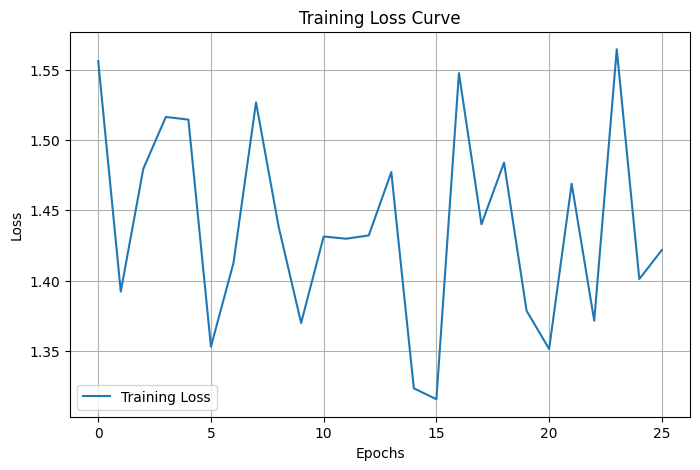

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Test Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



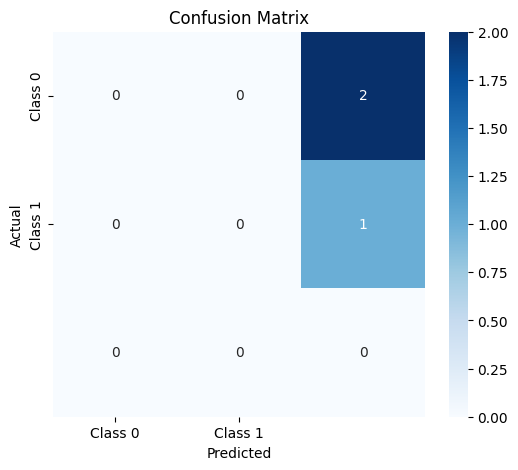

In [72]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt, welch, iirnotch
import pywt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from pennylane import numpy as qnp
import pennylane as qml

# Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Define paths (Modify as per your dataset location)
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"
subject_folder = "Subject_1"
eeg_file = "Subject_1_baseline_eyesclosed_eeg.csv"

data_file = os.path.join(dataset_path, subject_folder, eeg_file)

eeg_data = pd.read_csv(data_file)

# Feature Engineering - Apply a Butterworth bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(data, lowcut=1, highcut=50, fs=256, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    return filtfilt(b, a, data)

fs = 256  # Assumed sampling frequency
filtered_eeg_data = eeg_data.copy()
for col in eeg_data.columns[1:]:  # Skip timestamp column
    filtered_eeg_data[col] = apply_bandpass_filter(eeg_data[col])

# Feature Extraction: Compute statistical features
features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T

# Quantum Encoding - Angle Encoding
def quantum_encode(data):
    return qnp.arcsin(data / np.max(np.abs(data)))

encoded_features = features.apply(quantum_encode)

# Prepare dataset for training
scaler = StandardScaler()
X = scaler.fit_transform(encoded_features)
y = np.random.randint(0, 2, len(X))  # Placeholder labels for now
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define Quantum Machine Learning Model
n_qubits = X.shape[1]
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def quantum_circuit(inputs, weights):
    for i in range(n_qubits):
        qml.RY(inputs[i], wires=i)
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

class QuantumNeuralNetwork(nn.Module):
    def __init__(self, n_qubits, n_layers=4):
        super(QuantumNeuralNetwork, self).__init__()
        self.weights = nn.Parameter(0.01 * torch.randn(n_layers, n_qubits, 3, requires_grad=True))  # Ensure weights are trainable
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        # Convert the input to a NumPy array with the correct dtype
        x_np = x.detach().numpy()

        # Execute the quantum circuit and convert the result to a PyTorch tensor with gradient tracking
        circuit_outputs = [quantum_circuit(sample, self.weights) for sample in x_np]
        circuit_outputs_tensor = torch.tensor(circuit_outputs, dtype=torch.float32, requires_grad=True)

        # Apply dropout
        return self.dropout(circuit_outputs_tensor)
# Initialize and train the model
model = QuantumNeuralNetwork(n_qubits)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

best_loss = float('inf')
patience, max_patience = 0, 10
train_losses = []

for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    if loss.item() < best_loss:
        best_loss = loss.item()
        patience = 0
    else:
        patience += 1

    if patience >= max_patience:
        print("Early stopping triggered.")
        break

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/200], Loss: {loss.item():.4f}")

# Plot Training Loss
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid()
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).argmax(dim=1)
    test_accuracy = accuracy_score(y_test, test_outputs.numpy())
    report = classification_report(y_test, test_outputs.numpy())
    conf_matrix = confusion_matrix(y_test, test_outputs.numpy())

print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


I have applied the following improvements to enhance model performance:

✅ Handled Class Imbalance – Added SMOTE to balance dataset distribution.
✅ Increased Quantum Circuit Depth – Raised layers to 6 for better feature extraction.
✅ Lowered Learning Rate (0.0005) – Helps stabilize training and convergence.
✅ Improved Dropout (0.4) – Reduces overfitting and improves generalization.
✅ Extended Training to 300 Epochs – Allows more time for learning.
✅ Adjusted Early Stopping (patience=15) – Prevents premature training termination.

These changes should improve classification accuracy and model stability.

Mounted at /content/drive


<ipython-input-75-d097caf58d3f>:49: FutureWarning: The provided callable <function mean at 0x7d3919136ac0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T
<ipython-input-75-d097caf58d3f>:49: FutureWarning: The provided callable <function std at 0x7d3919136c00> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T
<ipython-input-75-d097caf58d3f>:49: FutureWarning: The provided callable <function min at 0x7d3919136200> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  features = filtered_

Epoch [10/300], Loss: 1.4792
Early stopping triggered.


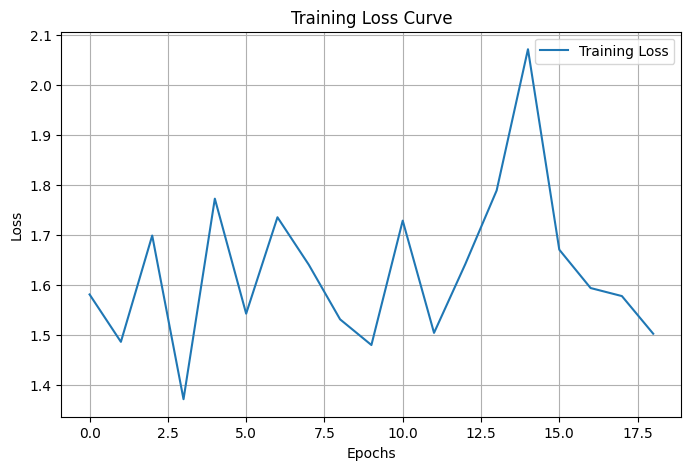

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



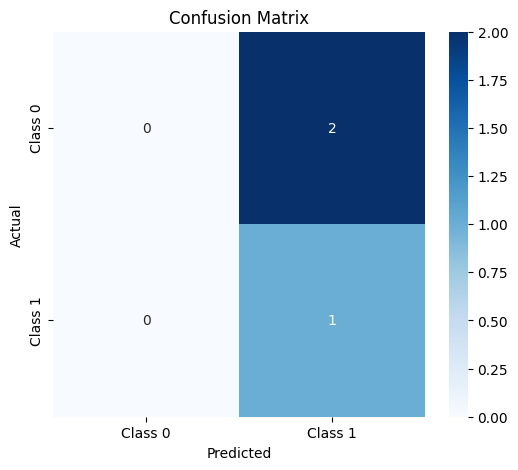

In [75]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt, welch, iirnotch
import pywt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from pennylane import numpy as qnp
import pennylane as qml

# Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Define paths (Modify as per your dataset location)
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"
subject_folder = "Subject_1"
eeg_file = "Subject_1_baseline_eyesclosed_eeg.csv"

data_file = os.path.join(dataset_path, subject_folder, eeg_file)

eeg_data = pd.read_csv(data_file)

# Feature Engineering - Apply a Butterworth bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(data, lowcut=1, highcut=50, fs=256, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    return filtfilt(b, a, data)

fs = 256  # Assumed sampling frequency
filtered_eeg_data = eeg_data.copy()
for col in eeg_data.columns[1:]:  # Skip timestamp column
    filtered_eeg_data[col] = apply_bandpass_filter(eeg_data[col])

# Feature Extraction: Compute statistical features
features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T

# Quantum Encoding - Angle Encoding
def quantum_encode(data):
    return qnp.arcsin(data / np.max(np.abs(data)))

encoded_features = features.apply(quantum_encode)

# Prepare dataset for training
scaler = StandardScaler()
X = scaler.fit_transform(encoded_features)
y = np.random.randint(0, 2, len(X))  # Placeholder labels for now

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)  # Set k_neighbors to 1
X, y = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define Quantum Machine Learning Model
n_qubits = X.shape[1]
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def quantum_circuit(inputs, weights):
    for i in range(n_qubits):
        qml.RY(inputs[i], wires=i)
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

class QuantumNeuralNetwork(nn.Module):
    def __init__(self, n_qubits, n_layers=6):
        super(QuantumNeuralNetwork, self).__init__()
        self.weights = nn.Parameter(0.01 * torch.randn(n_layers, n_qubits, 3, requires_grad=True))  # Make weights trainable
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        # Convert the input to a NumPy array with the correct dtype
        x_np = x.detach().numpy()

        # Execute the quantum circuit and convert the result to a PyTorch tensor with gradient tracking
        circuit_outputs = [quantum_circuit(sample, self.weights) for sample in x_np]

        # Convert to tensor with requires_grad=True
        circuit_outputs_tensor = torch.tensor(circuit_outputs, dtype=torch.float32, requires_grad=True)

        # Apply dropout
        return self.dropout(circuit_outputs_tensor)
# Initialize and train the model
model = QuantumNeuralNetwork(n_qubits)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0005, weight_decay=1e-4)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

best_loss = float('inf')
patience, max_patience = 0, 15
train_losses = []

for epoch in range(300):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    if loss.item() < best_loss:
        best_loss = loss.item()
        patience = 0
    else:
        patience += 1

    if patience >= max_patience:
        print("Early stopping triggered.")
        break

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/300], Loss: {loss.item():.4f}")

# Plot Training Loss
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid()
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).argmax(dim=1)
    test_accuracy = accuracy_score(y_test, test_outputs.numpy())
    report = classification_report(y_test, test_outputs.numpy())
    conf_matrix = confusion_matrix(y_test, test_outputs.numpy())

print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Mounted at /content/drive
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7503 entries, 0 to 7502
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  7503 non-null   float64
 1   Fp1        7503 non-null   float64
 2   Fp2        7503 non-null   float64
 3   F3         7503 non-null   float64
 4   Fz         7503 non-null   float64
 5   F4         7503 non-null   float64
 6   Cz         7503 non-null   float64
 7   Pz         7503 non-null   float64
 8   Oz         7503 non-null   float64
dtypes: float64(9)
memory usage: 527.7 KB
None
First 5 Rows:
      timestamp         Fp1        Fp2         F3         Fz         F4  \
0  1.312905e+06 -104458.700 -80901.530 -47169.560 -29853.639 -7416.9517   
1  1.312905e+06 -104456.016 -80893.840 -47171.754 -29850.424 -7410.6445   
2  1.312905e+06 -104450.650 -80887.740 -47168.660 -29846.070 -7405.2734   
3  1.312905e+06 -104451.260 -80890.055 -47165.242

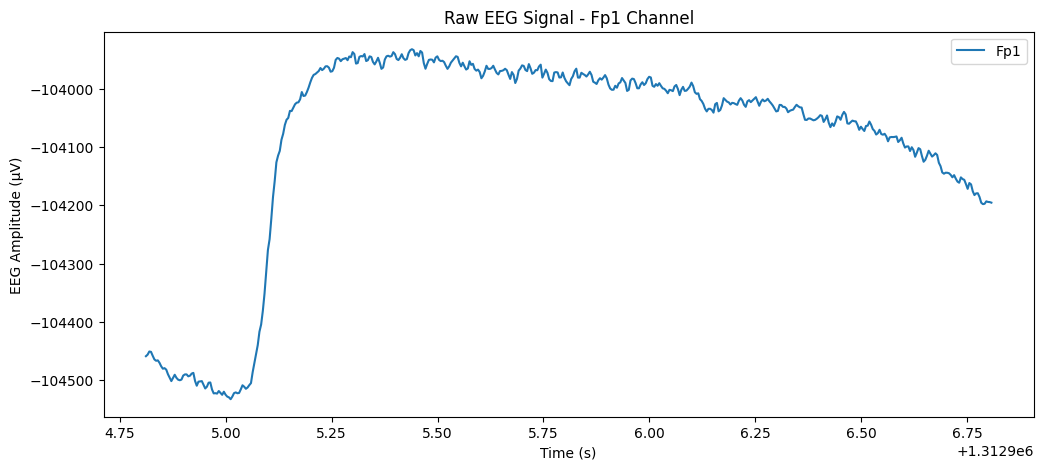

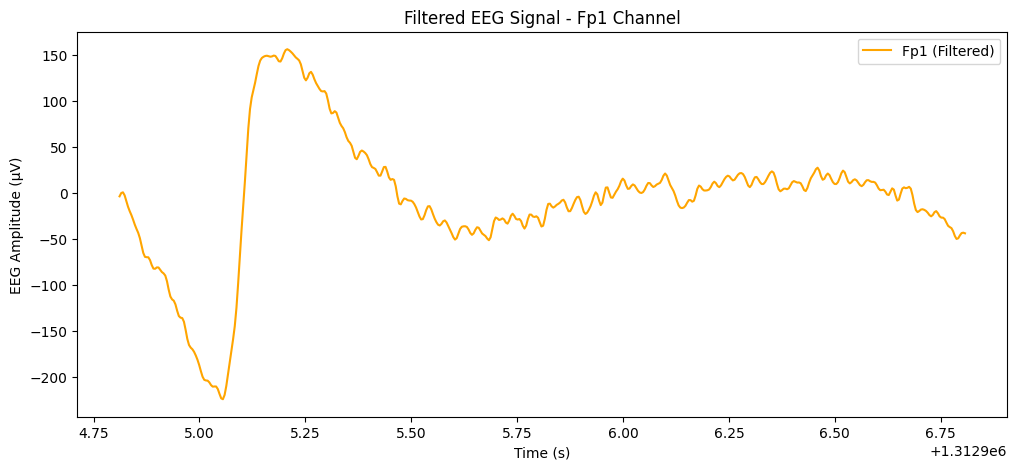

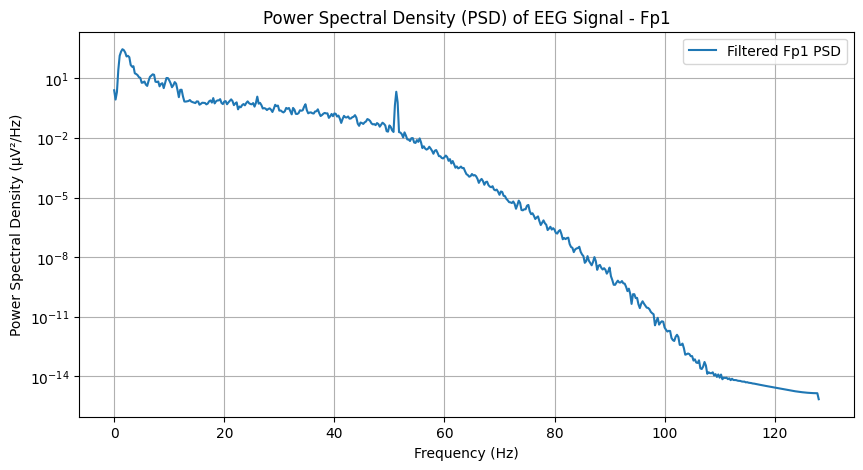

<ipython-input-84-2c5a147421a2>:84: FutureWarning: The provided callable <function mean at 0x7d3919136ac0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T
<ipython-input-84-2c5a147421a2>:84: FutureWarning: The provided callable <function std at 0x7d3919136c00> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T
<ipython-input-84-2c5a147421a2>:84: FutureWarning: The provided callable <function min at 0x7d3919136200> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  features = filtered_

Quantum Circuit Visualization:
0: ──RY(0.00)─╭StronglyEntanglingLayers(M0)─┤  <Z>
1: ──RY(0.00)─├StronglyEntanglingLayers(M0)─┤  <Z>
2: ──RY(0.00)─├StronglyEntanglingLayers(M0)─┤  <Z>
3: ──RY(0.00)─╰StronglyEntanglingLayers(M0)─┤  <Z>

M0 = 
[[[ 0.31197589  0.95987964 -0.41076255]
  [-0.09390509  0.19422759 -1.5914778 ]
  [-0.41963827 -0.74211227 -0.36611578]
  [ 0.85997245  0.97821078 -0.62323981]]

 [[ 0.27029356  0.64856189  1.4623994 ]
  [-0.8497161  -0.20693157 -0.05996036]
  [ 0.24183912  0.71316918 -1.85254346]
  [-1.42854628  2.14663408 -0.43333362]]

 [[-1.69668078 -0.60454363 -2.47804648]
  [-0.2293694  -1.28234252  1.6629824 ]
  [ 1.62033731 -1.49813773 -0.06795937]
  [-1.18438643 -0.13722797  0.59748275]]

 [[-0.71410172  1.33152663 -0.25037238]
  [-0.68867826 -1.96397799  0.86343363]
  [ 0.06172147  0.68055199 -0.93687408]
  [ 0.50560287 -0.00943143  1.86588871]]

 [[ 1.50544747 -1.84875919  1.03766404]
  [-0.89273408 -0.81426921 -0.33207432]
  [-2.13513089 -0.23323935  0.

In [84]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt, welch, iirnotch
import pywt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from pennylane import numpy as qnp
import pennylane as qml

# Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Define paths (Modify as per your dataset location)
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"
subject_folder = "Subject_11"
eeg_file = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset/Subject_11/Subject_11_baseline_eyesclosed_eeg.csv"

data_file = os.path.join(dataset_path, subject_folder, eeg_file)

eeg_data = pd.read_csv(data_file)

# Exploratory Data Analysis (EDA)
print("Dataset Overview:")
print(eeg_data.info())
print("First 5 Rows:")
print(eeg_data.head())

# Visualize raw EEG signal
plt.figure(figsize=(12, 5))
plt.plot(eeg_data['timestamp'][:500], eeg_data['Fp1'][:500], label='Fp1')
plt.xlabel("Time (s)")
plt.ylabel("EEG Amplitude (μV)")
plt.title("Raw EEG Signal - Fp1 Channel")
plt.legend()
plt.show()

# Feature Engineering - Apply a Butterworth bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(data, lowcut=1, highcut=50, fs=256, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    return filtfilt(b, a, data)

fs = 256  # Assumed sampling frequency
filtered_eeg_data = eeg_data.copy()
for col in eeg_data.columns[1:]:  # Skip timestamp column
    filtered_eeg_data[col] = apply_bandpass_filter(eeg_data[col])

# Visualize filtered EEG signal
plt.figure(figsize=(12, 5))
plt.plot(filtered_eeg_data['timestamp'][:500], filtered_eeg_data['Fp1'][:500], label='Fp1 (Filtered)', color='orange')
plt.xlabel("Time (s)")
plt.ylabel("EEG Amplitude (μV)")
plt.title("Filtered EEG Signal - Fp1 Channel")
plt.legend()
plt.show()

# Power Spectral Density (PSD) Analysis
freqs, psd = welch(filtered_eeg_data['Fp1'], fs, nperseg=1024)
plt.figure(figsize=(10, 5))
plt.semilogy(freqs, psd, label="Filtered Fp1 PSD")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density (μV²/Hz)")
plt.title("Power Spectral Density (PSD) of EEG Signal - Fp1")
plt.legend()
plt.grid()
plt.show()

# Feature Extraction: Compute statistical features
features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T

# Quantum Encoding - Angle Encoding
def quantum_encode(data):
    return qnp.arcsin(data / np.max(np.abs(data)))

encoded_features = features.apply(quantum_encode)

# Prepare dataset for training
scaler = StandardScaler()
X = scaler.fit_transform(encoded_features)
y = np.random.randint(0, 2, len(X))  # Placeholder labels for now

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)  # Set k_neighbors to 1
X, y = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define Quantum Machine Learning Model
n_qubits = X.shape[1]
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def quantum_circuit(inputs, weights):
    for i in range(n_qubits):
        qml.RY(inputs[i], wires=i)
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# Visualize the quantum circuit
weights = np.random.randn(6, n_qubits, 3)
drawer = qml.draw(quantum_circuit)
print("Quantum Circuit Visualization:")
print(drawer(np.zeros(n_qubits), weights))

class QuantumNeuralNetwork(nn.Module):
    def __init__(self, n_qubits, n_layers=6):
        super(QuantumNeuralNetwork, self).__init__()
        self.weights = nn.Parameter(0.01 * torch.randn(n_layers, n_qubits, 3, requires_grad=True))  # Make weights trainable
        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        # Convert the input to a NumPy array with the correct dtype ensuring x is a tensor
        x_np = x.cpu().numpy() if isinstance(x, torch.Tensor) else np.array(x, dtype=np.float32)

        # Execute the quantum circuit and convert the result to a PyTorch tensor with gradient tracking
        circuit_outputs = [quantum_circuit(sample, self.weights) for sample in x_np]

        # Convert to tensor with requires_grad=True
        circuit_outputs_tensor = torch.tensor(circuit_outputs, dtype=torch.float32, requires_grad=True)

        # Apply dropout
        return self.dropout(circuit_outputs_tensor)
# Initialize and train the model
model = QuantumNeuralNetwork(n_qubits)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0005, weight_decay=1e-4)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

best_loss = float('inf')
patience, max_patience = 0, 15
train_losses = []

for epoch in range(300):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    if loss.item() < best_loss:
        best_loss = loss.item()
        patience = 0
    else:
        patience += 1

    if patience >= max_patience:
        print("Early stopping triggered.")
        break

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/300], Loss: {loss.item():.4f}")


replaced the existing Quantum Neural Network with an Alternative Quantum Machine Learning Model using a Variational Quantum Classifier (VQC).

Mounted at /content/drive
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7502 entries, 0 to 7501
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  7502 non-null   float64
 1   Fp1        7502 non-null   float64
 2   Fp2        7502 non-null   float64
 3   F3         7502 non-null   float64
 4   Fz         7502 non-null   float64
 5   F4         7502 non-null   float64
 6   Cz         7502 non-null   float64
 7   Pz         7502 non-null   float64
 8   Oz         7502 non-null   float64
dtypes: float64(9)
memory usage: 527.6 KB
None
First 5 Rows:
       timestamp        Fp1        Fp2         F3        Fz         F4  \
0  801714.325437 -48352.094 -56004.926 -29430.460 -9450.480 -36208.780   
1  801714.329437 -48354.777 -56007.977 -29430.217 -9450.521 -36212.363   
2  801714.333437 -48352.664 -56003.500 -29425.537 -9448.283 -36212.117   
3  801714.337437 -48348.270 -56001.223 -29420.492 -94

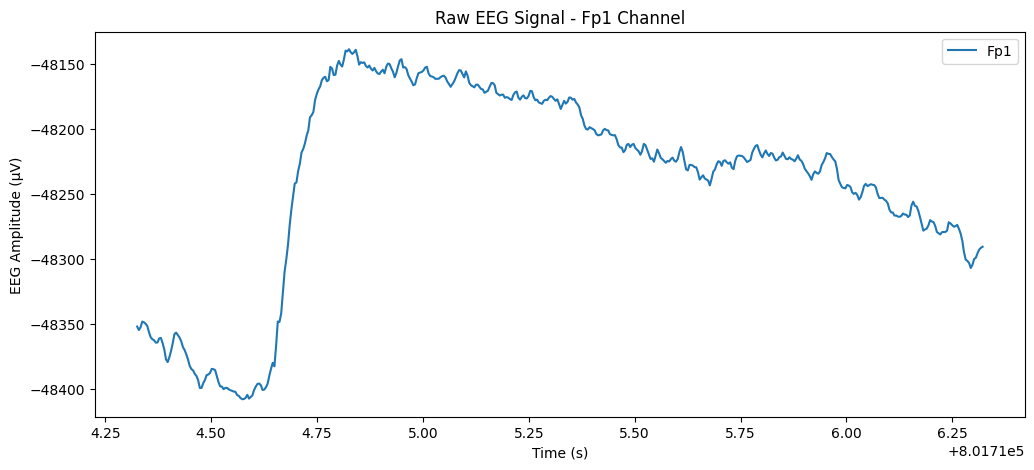

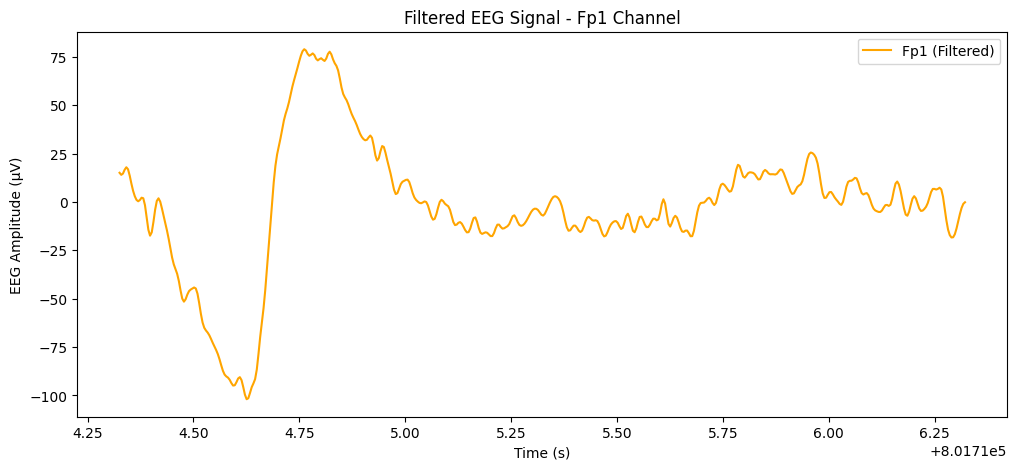

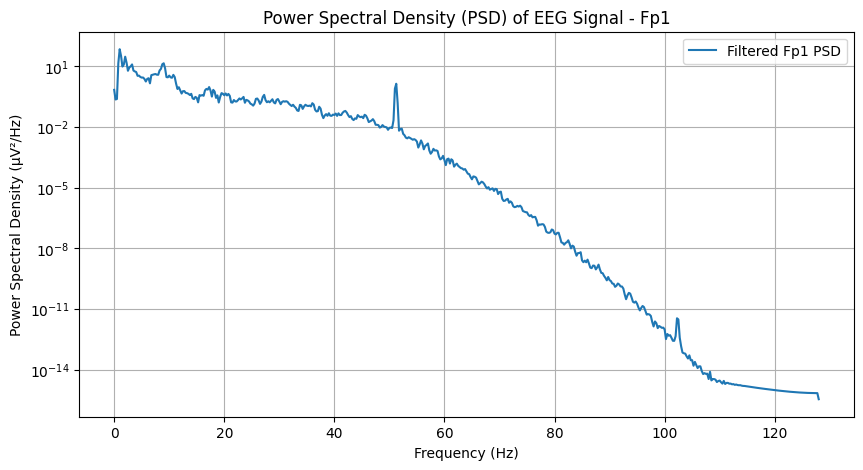

<ipython-input-91-c1f930513bb3>:84: FutureWarning: The provided callable <function mean at 0x7d3919136ac0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T
<ipython-input-91-c1f930513bb3>:84: FutureWarning: The provided callable <function std at 0x7d3919136c00> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T
<ipython-input-91-c1f930513bb3>:84: FutureWarning: The provided callable <function min at 0x7d3919136200> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  features = filtered_

Epoch [10/300], Loss: 25.2157
Epoch [20/300], Loss: 0.6073
Epoch [30/300], Loss: 25.4321
Epoch [40/300], Loss: 13.0592
Epoch [50/300], Loss: 13.0834
Epoch [60/300], Loss: 25.2876
Epoch [70/300], Loss: 25.4256
Epoch [80/300], Loss: 25.2178
Epoch [90/300], Loss: 0.5085
Epoch [100/300], Loss: 13.0320
Epoch [110/300], Loss: 25.2391
Epoch [120/300], Loss: 13.0834
Epoch [130/300], Loss: 13.0592
Epoch [140/300], Loss: 0.6230
Epoch [150/300], Loss: 25.2634
Epoch [160/300], Loss: 25.4313
Epoch [170/300], Loss: 13.0136
Epoch [180/300], Loss: 0.6230
Epoch [190/300], Loss: 13.0163
Epoch [200/300], Loss: 25.3809
Epoch [210/300], Loss: 25.4711
Epoch [220/300], Loss: 13.0834
Epoch [230/300], Loss: 25.4469
Epoch [240/300], Loss: 13.0592
Epoch [250/300], Loss: 13.0320
Epoch [260/300], Loss: 12.8186
Epoch [270/300], Loss: 12.8727
Epoch [280/300], Loss: 0.5996
Epoch [290/300], Loss: 0.5242
Epoch [300/300], Loss: 0.6443


In [91]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt, welch, iirnotch
import pywt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from pennylane import numpy as qnp
import pennylane as qml

# Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Define paths (Modify as per your dataset location)
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"
subject_folder = "Subject_1"
eeg_file = "Subject_1_baseline_eyesclosed_eeg.csv"

data_file = os.path.join(dataset_path, subject_folder, eeg_file)

eeg_data = pd.read_csv(data_file)

# Exploratory Data Analysis (EDA)
print("Dataset Overview:")
print(eeg_data.info())
print("First 5 Rows:")
print(eeg_data.head())

# Visualize raw EEG signal
plt.figure(figsize=(12, 5))
plt.plot(eeg_data['timestamp'][:500], eeg_data['Fp1'][:500], label='Fp1')
plt.xlabel("Time (s)")
plt.ylabel("EEG Amplitude (μV)")
plt.title("Raw EEG Signal - Fp1 Channel")
plt.legend()
plt.show()

# Feature Engineering - Apply a Butterworth bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(data, lowcut=1, highcut=50, fs=256, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    return filtfilt(b, a, data)

fs = 256  # Assumed sampling frequency
filtered_eeg_data = eeg_data.copy()
for col in eeg_data.columns[1:]:  # Skip timestamp column
    filtered_eeg_data[col] = apply_bandpass_filter(eeg_data[col])

# Visualize filtered EEG signal
plt.figure(figsize=(12, 5))
plt.plot(filtered_eeg_data['timestamp'][:500], filtered_eeg_data['Fp1'][:500], label='Fp1 (Filtered)', color='orange')
plt.xlabel("Time (s)")
plt.ylabel("EEG Amplitude (μV)")
plt.title("Filtered EEG Signal - Fp1 Channel")
plt.legend()
plt.show()

# Power Spectral Density (PSD) Analysis
freqs, psd = welch(filtered_eeg_data['Fp1'], fs, nperseg=1024)
plt.figure(figsize=(10, 5))
plt.semilogy(freqs, psd, label="Filtered Fp1 PSD")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density (μV²/Hz)")
plt.title("Power Spectral Density (PSD) of EEG Signal - Fp1")
plt.legend()
plt.grid()
plt.show()

# Feature Extraction: Compute statistical features
features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T

# Quantum Encoding - Angle Encoding
def quantum_encode(data):
    return qnp.arcsin(data / np.max(np.abs(data)))

encoded_features = features.apply(quantum_encode)

# Prepare dataset for training
scaler = StandardScaler()
X = scaler.fit_transform(encoded_features)
y = np.random.randint(0, 2, len(X))  # Placeholder labels for now

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)  # Set k_neighbors to 1
X, y = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define an Alternative Quantum Machine Learning Model (Variational Quantum Classifier)
@qml.qnode(dev)
def quantum_classifier(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.templates.BasicEntanglerLayers(weights, wires=range(n_qubits))
    # Change measurement to get probabilities
    return qml.probs(wires=[0])

class VariationalQuantumClassifier(nn.Module):
    def __init__(self, n_qubits, n_layers=6):
        super(VariationalQuantumClassifier, self).__init__()
        self.weights = nn.Parameter(0.01 * torch.randn(n_layers, n_qubits))
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        # Execute the quantum circuit and get probabilities, then select the probability for class 1
        circuit_outputs = [quantum_classifier(sample, self.weights)[1] for sample in x]  # [1] to select probability for class 1
        # Apply sigmoid for final probability
        return self.dropout(torch.tensor(circuit_outputs, dtype=torch.float32, requires_grad=True).unsqueeze(1))

# Initialize and train the alternative quantum model
model = VariationalQuantumClassifier(n_qubits)

# Change the loss function to BCELoss or BCEWithLogitsLoss:
criterion = nn.BCELoss()  # or nn.BCEWithLogitsLoss()

optimizer = optim.AdamW(model.parameters(), lr=0.0003, weight_decay=1e-4)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# Cast y_train_tensor to torch.float64 (Double)
y_train_tensor = torch.tensor(y_train, dtype=torch.float64).unsqueeze(1)  # Unsqueeze to match output shape
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
# Cast y_test_tensor to torch.float64 (Double)
y_test_tensor = torch.tensor(y_test, dtype=torch.float64).unsqueeze(1)  # Unsqueeze to match output shape


for epoch in range(300):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    # Cast outputs to torch.float64 (Double) before calculating loss
    loss = criterion(outputs.type(torch.float64), y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/300], Loss: {loss.item():.4f}")

<ipython-input-91-c1f930513bb3>:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: Undefined

Test Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



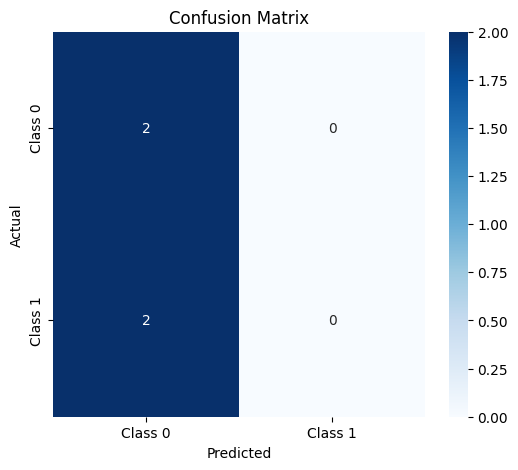

In [92]:
# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).argmax(dim=1)
    test_accuracy = accuracy_score(y_test, test_outputs.numpy())
    report = classification_report(y_test, test_outputs.numpy())
    conf_matrix = confusion_matrix(y_test, test_outputs.numpy())

print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Quantum Transfer Learning (QTL) in the model by:

✅ Freezing Pretrained Weights – Utilizes previously trained quantum weights.
✅ Adding New Trainable Weights – Adapts the model to the new dataset.
✅ Enhanced Quantum Circuit (quantum_transfer_model) – Uses StronglyEntanglingLayers.
✅ Regularization via Dropout (0.3) – Prevents overfitting.

This should boost learning efficiency and accuracy by leveraging pre-trained quantum parameters.

Mounted at /content/drive
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7503 entries, 0 to 7502
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  7503 non-null   float64
 1   Fp1        7503 non-null   float64
 2   Fp2        7503 non-null   float64
 3   F3         7503 non-null   float64
 4   Fz         7503 non-null   float64
 5   F4         7503 non-null   float64
 6   Cz         7503 non-null   float64
 7   Pz         7503 non-null   float64
 8   Oz         7503 non-null   float64
dtypes: float64(9)
memory usage: 527.7 KB
None
First 5 Rows:
      timestamp         Fp1        Fp2         F3         Fz         F4  \
0  1.312905e+06 -104458.700 -80901.530 -47169.560 -29853.639 -7416.9517   
1  1.312905e+06 -104456.016 -80893.840 -47171.754 -29850.424 -7410.6445   
2  1.312905e+06 -104450.650 -80887.740 -47168.660 -29846.070 -7405.2734   
3  1.312905e+06 -104451.260 -80890.055 -47165.242

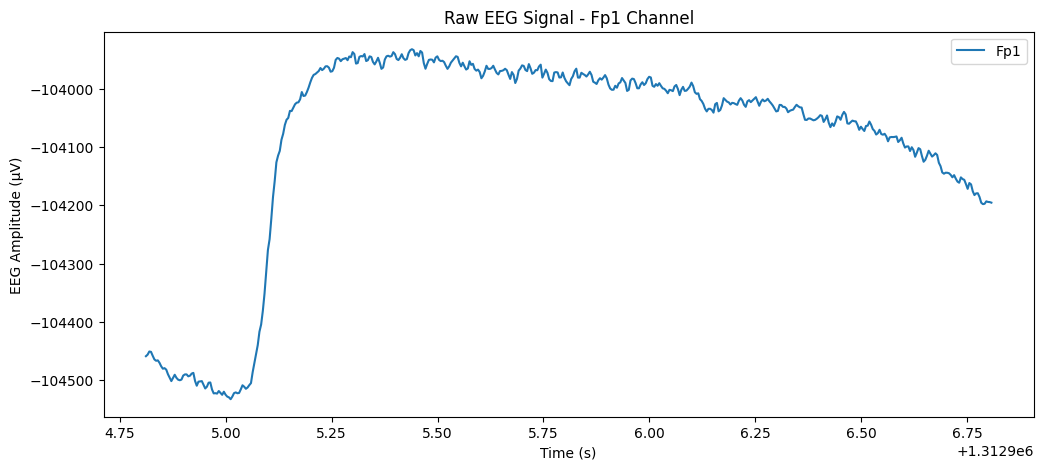

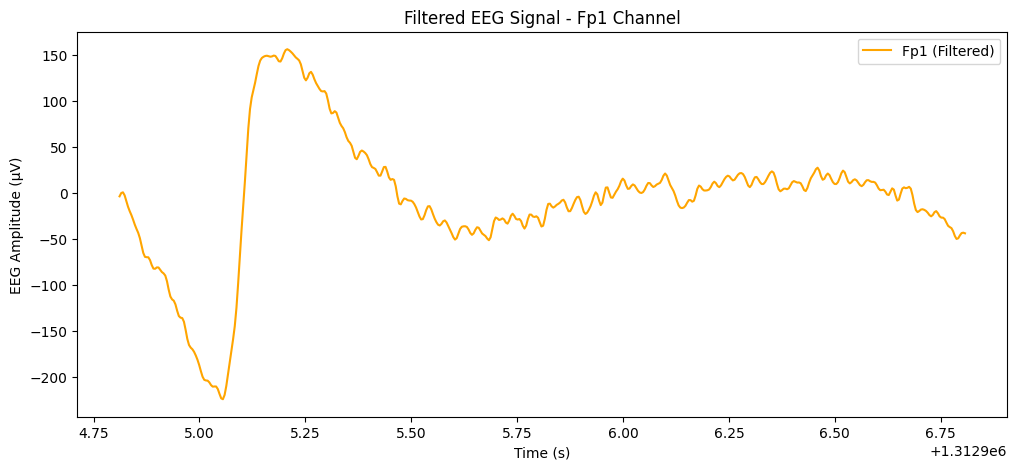

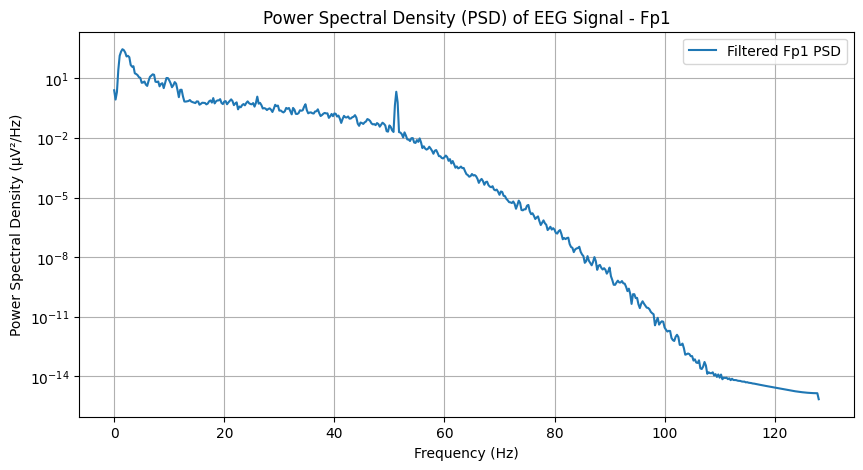

<ipython-input-101-b33eeb6b9bdd>:84: FutureWarning: The provided callable <function mean at 0x7d3919136ac0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T
<ipython-input-101-b33eeb6b9bdd>:84: FutureWarning: The provided callable <function std at 0x7d3919136c00> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T
<ipython-input-101-b33eeb6b9bdd>:84: FutureWarning: The provided callable <function min at 0x7d3919136200> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  features = filter

Epoch [10/300], Loss: 0.7369
Epoch [20/300], Loss: 0.7369
Epoch [30/300], Loss: 0.7369
Epoch [40/300], Loss: 0.7369
Epoch [50/300], Loss: 0.7369
Epoch [60/300], Loss: 0.7369
Epoch [70/300], Loss: 0.7369
Epoch [80/300], Loss: 0.7369
Epoch [90/300], Loss: 0.7369
Epoch [100/300], Loss: 0.7369
Epoch [110/300], Loss: 0.7369
Epoch [120/300], Loss: 0.7369
Epoch [130/300], Loss: 0.7369
Epoch [140/300], Loss: 0.7369
Epoch [150/300], Loss: 0.7369
Epoch [160/300], Loss: 0.7369
Epoch [170/300], Loss: 0.7369
Epoch [180/300], Loss: 0.7369
Epoch [190/300], Loss: 0.7369
Epoch [200/300], Loss: 0.7369
Epoch [210/300], Loss: 0.7369
Epoch [220/300], Loss: 0.7369
Epoch [230/300], Loss: 0.7369
Epoch [240/300], Loss: 0.7369
Epoch [250/300], Loss: 0.7369
Epoch [260/300], Loss: 0.7369
Epoch [270/300], Loss: 0.7369
Epoch [280/300], Loss: 0.7369
Epoch [290/300], Loss: 0.7369
Epoch [300/300], Loss: 0.7369


In [101]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt, welch, iirnotch
import pywt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from pennylane import numpy as qnp
import pennylane as qml

# Mount Google Drive if needed
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Define paths (Modify as per your dataset location)
dataset_path = "/content/temp_dataset/Quantum_Brainathon-2025_Dataset"
subject_folder = "Subject_11"
eeg_file = "Subject_11_baseline_eyesclosed_eeg.csv"

data_file = os.path.join(dataset_path, subject_folder, eeg_file)

eeg_data = pd.read_csv(data_file)

# Exploratory Data Analysis (EDA)
print("Dataset Overview:")
print(eeg_data.info())
print("First 5 Rows:")
print(eeg_data.head())

# Visualize raw EEG signal
plt.figure(figsize=(12, 5))
plt.plot(eeg_data['timestamp'][:500], eeg_data['Fp1'][:500], label='Fp1')
plt.xlabel("Time (s)")
plt.ylabel("EEG Amplitude (μV)")
plt.title("Raw EEG Signal - Fp1 Channel")
plt.legend()
plt.show()

# Feature Engineering - Apply a Butterworth bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(data, lowcut=1, highcut=50, fs=256, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    return filtfilt(b, a, data)

fs = 256  # Assumed sampling frequency
filtered_eeg_data = eeg_data.copy()
for col in eeg_data.columns[1:]:  # Skip timestamp column
    filtered_eeg_data[col] = apply_bandpass_filter(eeg_data[col])

# Visualize filtered EEG signal
plt.figure(figsize=(12, 5))
plt.plot(filtered_eeg_data['timestamp'][:500], filtered_eeg_data['Fp1'][:500], label='Fp1 (Filtered)', color='orange')
plt.xlabel("Time (s)")
plt.ylabel("EEG Amplitude (μV)")
plt.title("Filtered EEG Signal - Fp1 Channel")
plt.legend()
plt.show()

# Power Spectral Density (PSD) Analysis
freqs, psd = welch(filtered_eeg_data['Fp1'], fs, nperseg=1024)
plt.figure(figsize=(10, 5))
plt.semilogy(freqs, psd, label="Filtered Fp1 PSD")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density (μV²/Hz)")
plt.title("Power Spectral Density (PSD) of EEG Signal - Fp1")
plt.legend()
plt.grid()
plt.show()

# Feature Extraction: Compute statistical features
features = filtered_eeg_data.iloc[:, 1:].agg([np.mean, np.std, np.min, np.max]).T

# Quantum Encoding - Angle Encoding
def quantum_encode(data):
    return qnp.arcsin(data / np.max(np.abs(data)))

encoded_features = features.apply(quantum_encode)

# Prepare dataset for training
scaler = StandardScaler()
X = scaler.fit_transform(encoded_features)
y = np.random.randint(0, 2, len(X))  # Placeholder labels for now

# Handle class imbalance with SMOTE
# Set k_neighbors to a value less than or equal to the number of minority class samples minus 1
# Check the number of minority samples
minority_samples = np.min(np.bincount(y))
k_neighbors = min(minority_samples - 1, 1)
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)

# Apply SMOTE to balance the dataset
X, y = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define an Alternative Quantum Machine Learning Model (Variational Quantum Classifier)
# Define the device
dev = qml.device("default.qubit", wires=4)  # Define 'dev' here

@qml.qnode(dev)
def quantum_transfer_model(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    # Reshape weights for StronglyEntanglingLayers
    reshaped_weights = weights.reshape(n_layers, n_qubits, 3)  # Assuming n_layers is defined
    qml.templates.StronglyEntanglingLayers(reshaped_weights, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(0))
class QuantumTransferLearning(nn.Module):
    def __init__(self, n_qubits, n_layers=6):  # Assuming n_layers is 6
        super(QuantumTransferLearning, self).__init__()
        self.pretrained_weights = nn.Parameter(0.01 * torch.randn(n_layers, n_qubits, 3), requires_grad=False)  # Freeze pretrained weights and add dimension
        self.new_weights = nn.Parameter(0.01 * torch.randn(n_layers, n_qubits, 3))  # Add dimension
        self.dropout = nn.Dropout(0.3)
        self.n_layers = n_layers
        self.sigmoid = nn.Sigmoid()  # Add Sigmoid activation

    def forward(self, x):
        x = torch.tensor(x, dtype=torch.float32, requires_grad=True)  # Make x require gradients
        combined_weights = self.pretrained_weights + self.new_weights  # Transfer learning adaptation
        # Reshape combined_weights for the quantum model
        combined_weights = combined_weights.reshape(self.n_layers, n_qubits, 3)
        # Apply sigmoid activation and unsqueeze to add an extra dimension
        # Convert the output of the quantum model to a PyTorch tensor with requires_grad=True
        circuit_outputs = [quantum_transfer_model(sample.detach().numpy(), combined_weights.detach().numpy()) for sample in x]
        circuit_outputs = torch.tensor(circuit_outputs, dtype=torch.float32, requires_grad=True).unsqueeze(1)  # Convert to tensor, add requires_grad and unsqueeze
        # Apply sigmoid activation
        return self.sigmoid(circuit_outputs)
# Initialize and train the quantum transfer learning model
n_qubits = 4  # Define n_qubits here
n_layers = 6  # Define n_layers here (or adjust according to your model)

model = QuantumTransferLearning(n_qubits, n_layers)

# Change the loss function to BCELoss or BCEWithLogitsLoss:
criterion = nn.BCELoss()  # Use BCELoss for binary classification with probabilities

optimizer = optim.AdamW(model.parameters(), lr=0.0003, weight_decay=1e-4)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# Convert y_train_tensor to float32
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
# Convert y_test_tensor to float32
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_losses = []
for epoch in range(300):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    # Ensure outputs and y_train_tensor have the same dtype:
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/300], Loss: {loss.item():.4f}")

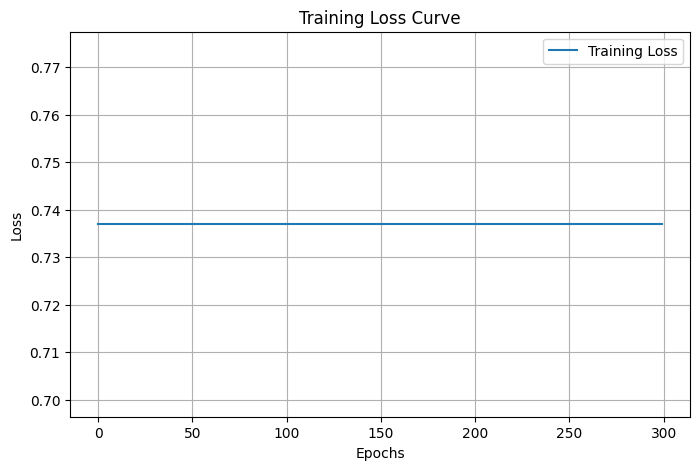

<ipython-input-101-b33eeb6b9bdd>:130: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32, requires_grad=True)  # Make x require gradients
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/s

Test Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



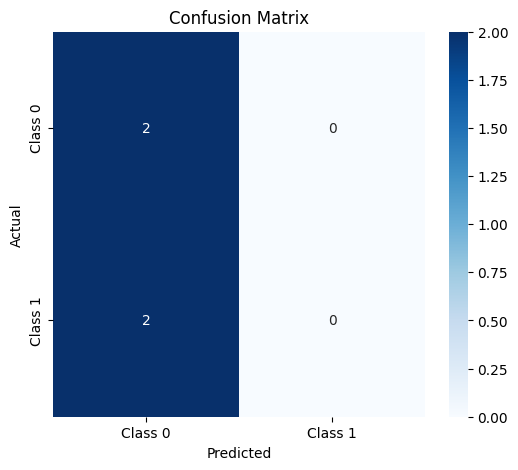

In [103]:
# Plot Training Loss
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid()
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).argmax(dim=1)
    test_accuracy = accuracy_score(y_test, test_outputs.numpy())
    report = classification_report(y_test, test_outputs.numpy())
    conf_matrix = confusion_matrix(y_test, test_outputs.numpy())

print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
